# Aprendizaje Automático - Práctica 2 - Experimentación con agrupamiento y detección de anomalías  no supervisada

#### Valoración máxima: 10 puntos

#### Fecha límite de entrega: 19 de Mayo de 2024 a las 23:59

#### Entrega a través de https://pradogrado2324.ugr.es/

### Nombre completo: <mark>Eduardo Rodríguez Cao</mark>



---


**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`) o, en su defecto, tres Notebooks de Colab (uno con cada ejercicio). No es necesario entregar ninguna memoria externa (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. Sin esta documentación, se considera que el trabajo NO ha sido presentado.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código NO puede escribir nada a disco.

- El path de lectura desde Google Drive debe ser siempre el mismo, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


---

## <font color='blue'>Ejercicio 1: OPTIMIZANDO k-MEANS y DBSCAN (4 puntos)</font>

<font color='blue'>La optimización de algoritmos de clustering como k-Means y DBSCAN en aprendizaje automático es fundamental para abordar aplicaciones reales debido a varias razones críticas. Primero, estas técnicas son ampliamente aplicadas en la segmentación de clientes, detección de anomalías, sistemas de recomendación, y otras áreas donde la agrupación efectiva de datos es crucial para extraer _insights_ significativos y tomar decisiones informadas. Optimizar estos algoritmos permite manejar grandes volúmenes de datos de manera eficiente, mejorando la velocidad y reduciendo los costos computacionales, lo cual es esencial en entornos donde el tiempo y los recursos son limitados. Además, al afinar estos métodos para incrementar su precisión y sensibilidad, se pueden identificar patrones y tendencias con mayor exactitud, lo que resulta en modelos más robustos y confiables. En un mundo donde los datos crecen exponencialmente, la capacidad de procesar y analizar esta información de manera efectiva es clave para el éxito en diversas aplicaciones prácticas, haciendo de la optimización y uso (incluso como parte de estrategias complejas de entrenamiento) de algoritmos de _clustering_ un componente indispensable en el campo del _machine learning_.

<font color='blue'>En este ejercicio intentaremos profundizar un poco en cómo optimizar y operar con dos algoritmos de clustering básicos (k-Means y DBSCAN).



---




<font color='blue'>Primero, importamos las librerías necesarias y fijamos la semilla aleatoria para que nuestros resultados sean reproducibles entre ejecuciones.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

# Fijamos la semilla aleatoria
np.random.seed(42) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

# Cambiamos aspecto de los gráficos
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)





---






### <font color='blue'>Ejercicio 1.A: Optimizando k-Means (3 puntos)</font>

<font color='blue'> Vamos a entrenar un agrupador K-Means en un conjunto de datos sintético en 2D, y vamos a intentar encontrar el centro de cada mancha y asignar cada instancia a la mancha/agrupación más cercana. Las tareas concretas a realizar en este ejercicio se resumen a continuación:
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.
5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.
6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?
7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.
8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

blobs_c = np.array([[ 0,  2.5], [-1.5 ,  2.3], [-2.8,  1.7],
                         [-2.6,  3.5], [-2.9,  1.4]])
blob_std = np.array([0.45, 0.25, 0.1, 0.1, 0.05])
X, y = make_blobs(n_samples=2000, centers=blobs_c, cluster_std=blob_std,
                  random_state=42)

<font color='blue'> Dibujamos las manchas.

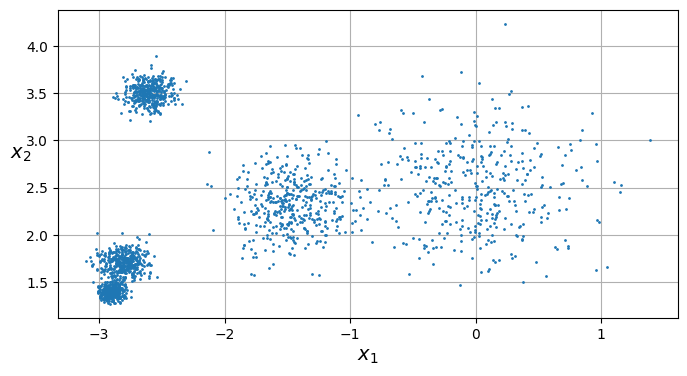

In [3]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

<font color='blue'>
1.   Completamos el código con el ajuste de un `KMeans` usando 5 clusters y el hiperparámetro `n_init` con un valor igual a 1. Este hiperparámetro nos dice el número de veces que se ejecuta el algoritmo k-means con diferentes semillas de centroide (inicializaciones aleatorias). El resultado final es el mejor resultado de `n_init` ejecuciones consecutivas en términos de inercia. En general, suele ser recomendable emplear varias ejecuciones (especialmente, en problemas con alta dimensionalidad).

In [4]:
# Apartado 1
k = 5
kmeans = KMeans(n_clusters=k, n_init=1, random_state=42)
#A CUBRIR POR EL ALUMNADO
y_pred = kmeans.fit_predict(X) # Ajustamos

<font color='blue'>
2.   Cada instancia se asignará a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que el algoritmo asigna esta instancia; esto no debe confundirse con las etiquetas de clase en clasificación, que se utilizan como objetivos. La instancia `KMeans` conserva las etiquetas predichas de las instancias con las que se entrenó, disponibles a través de la variable de instancia `labels_`. Imprimimos los centros de los 5 clusters y dibujamos los bordes de decisión de los 5 clusters obtenidos.

Centroides: [[ 0.0783778   2.16451394]
 [-2.85127128  1.55334118]
 [-2.60140129  3.49914817]
 [-0.0207084   2.89114195]
 [-1.44785999  2.31813847]]


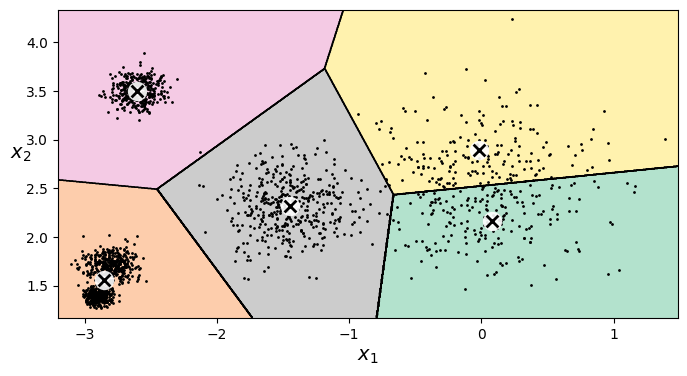

In [5]:
#Apartado 2
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

#A CUBRIR POR EL ALUMNADO
print(f'Centroides: {kmeans.cluster_centers_}')
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Efectivamente como podemos ver con `n_init` a $1$ el algoritmo no va muy bien. Necesita más iteraciones para converger a la solución.

<font color='blue'>
3. Predecimos cuatro nuevas instancias con valores `[[0, 2], [3, 2], [-3, 3], [-3, 2.5]]` utilizando el enfoque de clustering duro (`predict`) y clustering flexible (`transform`). En el primer caso, se proporciona uno de los clusters como aquel al que pertenece la instancia bajo estudio (es decir, cada instancia se asume que pertenece a un único cluster). En el segundo, se recupera un valor de pertenencia difuso/parcial de la instancia a cada uno de los clusters (es decir, cada instancia tiene un cierto grado de pertenencia a cada uno de los clusters).

In [6]:
#Apartado 3
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
#A CUBRIR POR EL ALUMNADO
print("Clustering duro:")
print(kmeans.predict(X_new))
print("Clustering flexible")
kmeans.transform(X_new).round(2) # Redondeo para mejor interpretabilidad

Clustering duro:
[0 0 2 1]
Clustering flexible


array([[0.18, 2.89, 3.  , 0.89, 1.48],
       [2.93, 5.87, 5.8 , 3.15, 4.46],
       [3.19, 1.45, 0.64, 2.98, 1.7 ],
       [3.1 , 0.96, 1.08, 3.  , 1.56]])

Viendo el diagrama anterior, vemos que las predicciones concuerdan. En el caso de clustering flexible además se ve cómo cada punto tiene menores y mayores distancias de todos los clusters. En el caso del primer punto, vemos como su distancia del cluster 0 es 0.18, por eso el clustering duro lo clasifica como perteneciente a ese cluster.

<font color='blue'>
4. A continuación, vamos a ver de qué forma influye la inicialización de los centroides en el resultado final. Vamos a escoger, de forma aproximada, dónde se pueden poner los 5 centroides para comenzar a iterar con un k-means. Para ello se puede lanzar `KMeans` con el hiperparámetro `n_init=1` y el hiperparámetro `init` con un `np.array` de 5 puntos en 2D escogidos manualmente por el estudiante. Prueba qué ocurre en este caso, imprimiendo los centros y dibujando los bordes de decisión de los 5 clusters obtenidos.

Centroides: [[-2.89613756  1.40395196]
 [-2.80242208  1.71599211]
 [-1.43985943  2.32299308]
 [ 0.04182943  2.50782834]
 [-2.60140129  3.49914817]]


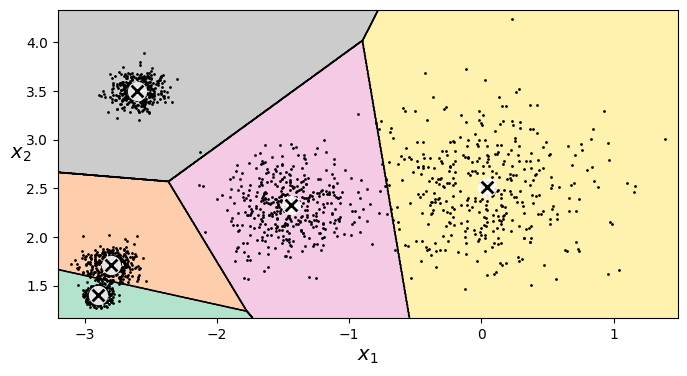

In [7]:
#Apartado 4
good_init = np.array([[-3.1, 1.2], [-2.7, 2], [-1.5, 2], [1, 2.5], [-2.2, 3.7]]) #A CUBRIR POR EL ALUMNADO
#A CUBRIR POR EL ALUMNADO
kmeans = KMeans(n_clusters=k, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
print(f'Centroides: {kmeans.cluster_centers_}')
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

Como he escogido los 5 puntos bastante separados entre sí y cercanos a clusters distintos, como es esperable, me salen bordes de decisión mucho mejores que antes. Obviamente se parece a la solución buscada ya que he elegido los puntos sabiendo cual es la solución. Si los escogiera sin guiarme por esa información saldría muy distinto.

<font color='blue'> 5. En la mayoría de casos reales y de interés, no es viable saber dónde están los centroides, pues los datos son más complejos. Para estos casos, el hiperpárametro `n_init` tiene un valor por defecto de 10; lo que significa que todo el algoritmo se ejecuta 10 veces cuando se llama a `fit()`, y Scikit-Learn se queda con la mejor solución. Pero, ¿cómo sabe exactamente qué solución es la mejor? Utiliza una métrica de rendimiento. Esa métrica se llama inercia del modelo, que es la suma de las distancias al cuadrado entre las instancias y sus centroides más cercanos. La clase `KMeans` ejecuta el algoritmo `n_init` veces y se queda con el modelo con la inercia más baja. La inercia de un modelo es accesible a través de la variable de instancia `inertia_`. El método `score()` devuelve la inercia negativa. ¿Por qué crees que devuelve el valor negativo? Imprime los valores `inertia_` y `score()` obtenidos en el apartado anterior.

In [8]:
#Apartado 5
#A CUBRIR POR EL ALUMNADO
print(f'Inercia: {kmeans.inertia_}')
print(f'Score: {kmeans.score(X)}')

Inercia: 212.06752296117577
Score: -212.06752296117577


El score es negativo simplemente porque en Scikit-Learn se tiene la regla de que "mayor es mejor" para un predictor. Luego como en el caso de la inercia pretendemos minimizarla, le ponemos signo menos al score para invertir la inercia.

<font color='blue'> 6. Prueba diferentes métodos de inicialización (hiperparámetro `init`) y diferentes variantes de k-Medias con el hiperparámetro `algorithm`. Describe cada método de inicialización y compara gráficamente el resultado. ¿Notas diferencias significativas en las figuras representadas? ¿Por qué?

Para métodos de inicialización, por defecto está `k-means++`, que es el mismo algoritmo k-medias pero con una inicialización inteligente que permite reducir el número de inicializaciones `n_init` considerablemente evitando converger a una solución subóptima. También hemos visto que se puede inicializar manualmente (usaré el `good_init` que he definido anteriormente). Y por último se puede inicializar de forma aleatoria, poniendo la opción `random`.

En cuanto a `algorithm`, está la opción `full`, que es el algoritmo normal, y `elkan`, que algunas veces acelera el algoritmo y otras no, dependiendo del dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


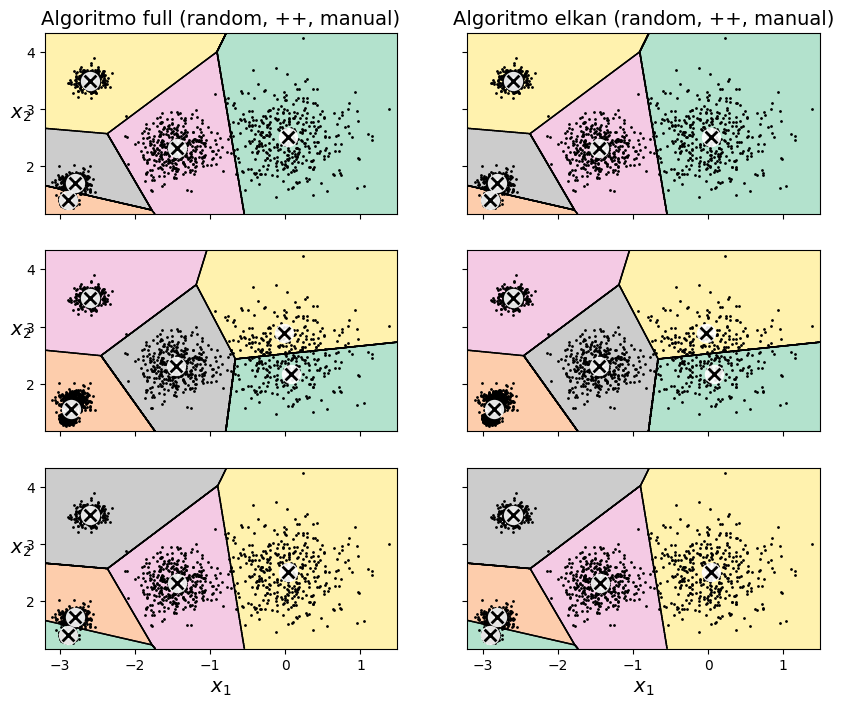

In [9]:
#Apartado 6
#A CUBRIR POR EL ALUMNADO

kmeans_random_full = KMeans(n_clusters=k, init="random", algorithm = "full", n_init=1, random_state=42)
kmeans_pluspl_full = KMeans(n_clusters=k, init="k-means++", algorithm = "full", n_init=1, random_state=42)
kmeans_manual_full = KMeans(n_clusters=k, init=good_init, algorithm = "full", n_init=1, random_state=42)

kmeans_random_elka = KMeans(n_clusters=k, init="random", algorithm = "elkan", n_init=1, random_state=42)
kmeans_pluspl_elka = KMeans(n_clusters=k, init="k-means++", algorithm = "elkan", n_init=1, random_state=42)
kmeans_manual_elka = KMeans(n_clusters=k, init=good_init, algorithm = "elkan", n_init=1, random_state=42)

# Ajustamos
kmeans_random_full.fit(X)
kmeans_pluspl_full.fit(X)
kmeans_manual_full.fit(X)

kmeans_random_elka.fit(X)
kmeans_pluspl_elka.fit(X)
kmeans_manual_elka.fit(X)

# Pintamos gráfica en 3 filas 2 columnas
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_decision_boundaries(kmeans_random_full, X, show_xlabels=False)
plt.title("Algoritmo full (random, ++, manual)")

plt.subplot(322)
plot_decision_boundaries(kmeans_random_elka, X, show_xlabels=False,
                         show_ylabels=False)
plt.title("Algoritmo elkan (random, ++, manual)")

plt.subplot(323)
plot_decision_boundaries(kmeans_pluspl_full, X, show_xlabels=False)

plt.subplot(324)
plot_decision_boundaries(kmeans_pluspl_elka, X, show_xlabels=False,
                         show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_manual_full, X)

plt.subplot(326)
plot_decision_boundaries(kmeans_manual_elka, X, show_ylabels=False)

plt.show()

En este caso vemos que la inicialización manual va bien, como ya habíamos visto. El de inicialización optimizada no tanto, aunque el resultado tiene sentido ya que se equivoca agrupando los dos clusters chicos y partiendo el grande en dos. Se podría decir que por aleatoriedad el random va mejor, aunque no es lo esperado. Quizá con mayor número de inicializaciones la inicialización optimizada irá mejor que el random.

<font color='blue'> 7. Vamos a encontrar el número óptimo de clusters utilizando el silhouette score, que lo podéis encontrar en `sklearn.metrics` importando `silhouette_score`.  Vamos a visualizar  este score para diferente número de clusters, desde 2 hasta 15  (ambos inclusive): eje X (número de clusters) vs eje Y (silhouette score).  Aquí utilizaremos el valor `n_init=10`. Analiza los resultados obtenidos.

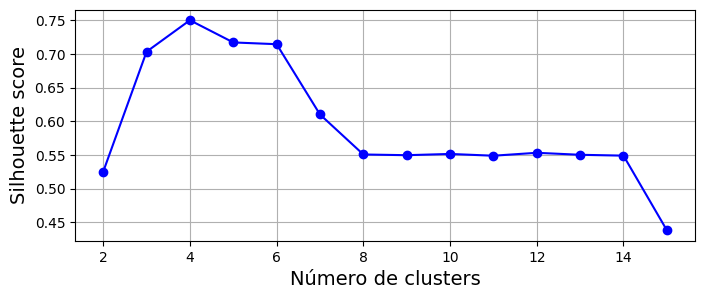

In [10]:
#Apartado 7
from sklearn.metrics import silhouette_score

#A CUBRIR POR EL ALUMNADO
# Hago k-medias para cada k de 2 a 15
kmeans_per_k = [KMeans(n_clusters=k, n_init=10, random_state=42).fit(X)
                for k in range(2, 16)]

# Calculo silhouette scores
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k]

# Pinto
plt.figure(figsize=(8, 3))
plt.plot(range(2, 16), silhouette_scores, "bo-")
plt.xlabel("Número de clusters")
plt.ylabel("Silhouette score")
plt.grid()
plt.show()

El silhouette score es mayor cuando de media las instancias están más cerca de las instancias del mismo cluster y más lejos de las instancias del cluster más cercano distinto. Como podemos ver, $k=4$ tiene mayor score. Tiene sentido, ya que hemos visto que el algoritmo a menudo agrupa los dos clusters pequeños en uno por ser muy densos y cercanos el uno del otro. También vemos que la solución es la segunda con score más grande, y $k=6$ es la tercera, que podría interpretarse como que el cluster grande se puede partir en dos, que también se ha visto. Aunque los resultados tienen sentido, nos puede confundir que $k=4$ tenga mejor score.

<font color='blue'> 8. Se puede obtener una visualización aún más informativa si representamos el coeficiente
de silueta de cada instancia, ordenado por los clusters a los que está asignada y
por el valor del coeficiente. Esto se denomina diagrama de siluetas
(véase https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).
Cada diagrama contiene una forma de cuchillo por cluster. La altura de la forma indica el número
de instancias en el cluster, y su anchura representa los coeficientes de silueta
ordenados de las instancias en el cluster (más ancho es mejor). Dibuja los
coeficientes de silueta para un $k=\{3,4,5,6\}$ y analiza los resultados obtenidos.

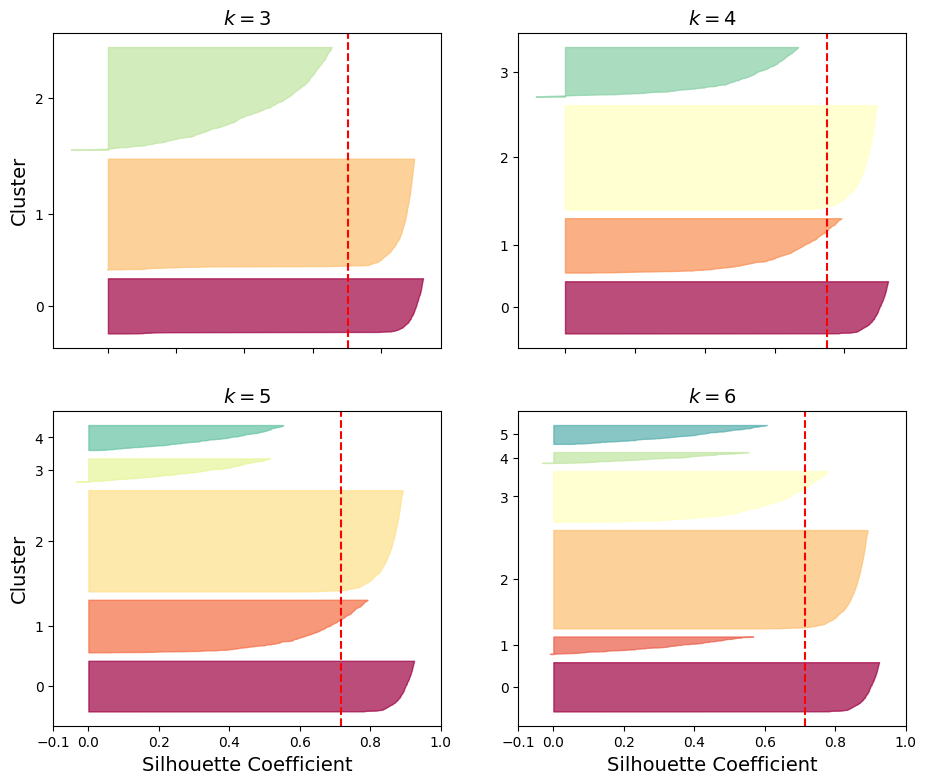

In [11]:
#Apartado 8

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

#A CUBRIR POR EL ALUMNADO
# Tomado del notebook de Aurelien Geron
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

La línea vertical representa el silhouette score medio para cada número de clusters $k$. Cuando los cuchillos sobrepasan esta línea es mejor, ya que significa que las instancias están más lejos de otros clusters. En nuestro caso vemos que cuando $k=3$, aunque dos cuchillos sobrepasan la línea, tienen distintas anchuras lo cual está mal, para $k=6$ hay tres cuchillos muy pequeños y en general son todos de anchuras muy variadas, luego está mal, para $k=4$ parece que es el mejor caso, pero hay un cuchillo demasiado grande que nos hace pensar que quizá un cluster más estaría bien. Finalmente la solución $k=5$ tiene tres cuchillos de tamaños similares que sobrepasan la línea, y dos cuchillos muy pequeños, que tiene sentido debido a que los dos clusters pequeños están muy cerca el uno del otro. En general, incluso visto con diagrama no queda muy claro si $k=5$ es mejor que $k=4$. A lo mejor para que quede claro sería buena idea estudiar los dos clusters cercanos para ver si es mejor separarlos o agruparlos en 1.

<font color='blue'>
9. El conjunto de datos clásico de Olivetti contiene 400 imágenes de rostros en escala
de grises de 64×64 píxeles. Cada imagen se aplana a un vector 1D de tamaño 4.096.
Se fotografiaron 40 personas diferentes (10 veces cada una), y la tarea habitual es
entrenar un modelo que pueda predecir qué persona está representada en cada imagen.
Carga el conjunto de datos utilizando la función `sklearn.datasets.fetch_olivetti_faces()`
y, a continuación, divídelo en un conjunto de entrenamiento y
unode test (ten en cuenta que el conjunto de datos ya está escalado entre 0 y 1).
Dado que el conjunto de datos es bastante pequeño, probablemente necesitaremos utilizar un muestreo
estratificado (`StratifiedShuffleSplit`) para asegurarnos de que hay el mismo número de imágenes por persona/clase/cluster en cada conjunto.
A continuación, agrupa las imágenes utilizando tres modelos de k-means (k-means++ con `n_init=10`,
random con `n_init=1`, y random con `n_init=10` y el algoritmo ` elkan` para agilizar cómputo), y
asegúrate de que empleamos un buen número de clústers (utilizando técnicas de los apartados anteriores).
Visualiza los clusters utilizando el mejor modelo (bajo tu criterio, que debes justificar) de los tres previos: ¿ves caras
similares en cada cluster? Es decir, ¿hemos sido capaces de agrupar rostros de las mismas personas de forma no supervisada? ¿Cómo de buenas son las predicciones realizadas con el conjunto de test: se corresponden adecuadamente con las identidades de entrenamiento?
¿Qué conclusiones extraes en base al trabajo realizado y los resultados obtenidos?
NOTA: Puedes utilizar reducción de dimensionalidad para agilizar el cómputo.

In [12]:
#Apartado 9

from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()

from sklearn.model_selection import StratifiedShuffleSplit

#A CUBRIR POR EL ALUMNADO

def plot_faces(faces, labels, n_cols=5):
    faces = faces.reshape(-1, 64, 64)
    n_rows = (len(faces) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols, n_rows * 1.1))
    for index, (face, label) in enumerate(zip(faces, labels)):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(face, cmap="gray")
        plt.axis("off")
        plt.title(label)
    plt.show()

#A CUBRIR POR EL ALUMNADO

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


Primero veamos lo que dicen los creadores del dataset. Aunque el enunciado describe el problema, está bien leer esa descripción.

In [13]:
print(olivetti.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

Efectivamente es como en el enunciado. Vamos a dividir el dataset en conjuntos de entrenamiento y de test. Usaré `StratifiedShuffleSplit` tal y como se recomienda, y apartaré un 20% del dataset para el conjunto de test. Es decir 80 ejemplos.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

# Hago split y extraigo índices de los conjuntos
strat_split = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
train_i, test_i = next(strat_split.split(olivetti.data, olivetti.target))

# Obtengo conjuntos
X_train = olivetti.data[train_i]
y_train = olivetti.target[train_i]
X_test = olivetti.data[test_i]
y_test = olivetti.target[test_i]

# Dimensiones de los conjuntos
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(320, 4096) (320,)
(80, 4096) (80,)


Como tenemos 4096 dimensiones, hago PCA para agilizar el cómputo. 4096 es mucho y teniendo en cuenta que trabajamos con imágenes, sabemos que no perdemos mucho reduciendo dimensionalidad. Reduciré manteniendo un 99% de varianza.

In [15]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Dimensiones tras reducir: {pca.n_components_}")

Dimensiones tras reducir: 222


222 en vez de 4096, perdiendo solo 1% de información. Realmente ha valido la pena.

Ahora vamos a escribir una función que devuelva el mejor modelo k-medias para k en el intervalo $[5, 150]$ con paso $5$ dados los parámetros `init` y `n_init`. El mejor modelo se determinará por el silhouette score mejor. Se visualizarán tanto el silhouette score como la inercia para cada k, y se anotará en la gráfica el mejor k y el correspondiente silhouette score.

In [16]:
def optimize_cluster_num(init_val, n_init_val):
  k_range = range(5, 150, 5)  # Rango
  kmeans_per_k = [] # Vector con los kmeans
  # Entreno modelo
  for k in k_range:
    kmeans = KMeans(n_clusters=k, init = init_val, n_init=n_init_val,
                    algorithm = "elkan", random_state=42)
    kmeans.fit(X_train_pca)
    kmeans_per_k.append(kmeans)

  # Calculo silhouette scores
  silhouette_scores = [silhouette_score(X_train_pca, model.labels_)
                      for model in kmeans_per_k]
  # Encuentro mejor
  best_index = np.argmax(silhouette_scores)
  best_k = k_range[best_index]
  best_score = silhouette_scores[best_index]
  best_rounded = '%.3f' % round(best_score,3)

  # Pinto
  plt.figure(figsize=(8, 3))
  plt.plot(k_range, silhouette_scores, "bo-")
  plt.xlabel("$k$")
  plt.ylabel("Silhouette score")
  plt.plot(best_k, best_score, "rs")
  plt.annotate(f"k={best_k} score={best_rounded}", xy=(best_k, best_score),
          xytext=(best_k-6,best_score-0.03), color="green", weight="heavy",
          fontsize=6, arrowprops={"facecolor": "lightgreen"})
  plt.grid()
  plt.show()

  # Calculo inercias
  inertias = [model.inertia_ for model in kmeans_per_k]
  best_inertia = inertias[best_index]

  plt.figure(figsize=(8, 3.5))
  plt.plot(k_range, inertias, "bo-")
  plt.xlabel("$k$")
  plt.ylabel("Inercia")
  plt.plot(best_k, best_inertia, "rs")
  plt.annotate(f"k={best_k} inercia={round(best_inertia)}", xy=(best_k, best_inertia),
          xytext=(best_k-10,best_inertia+3000), color="green", weight="heavy",
          fontsize=6, arrowprops={"facecolor": "lightgreen"})
  plt.grid()
  plt.show()
  return kmeans_per_k[best_index]

Probamos primero con k-means++ y `n_init`=10

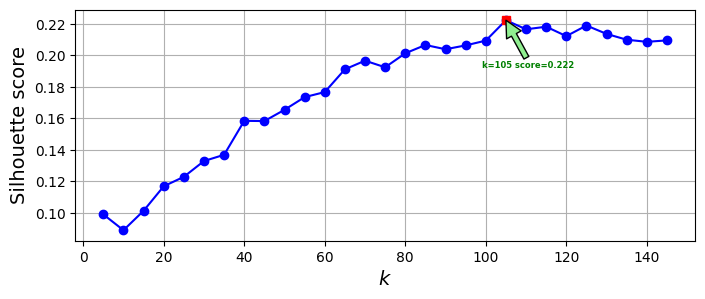

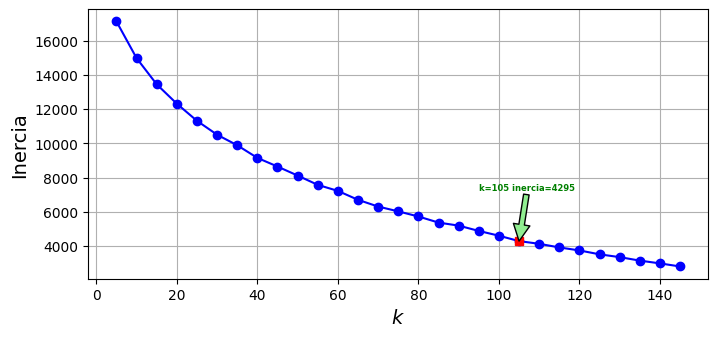

In [17]:
best_model1 = optimize_cluster_num(init_val = "k-means++", n_init_val = 10)

Obtenemos $k=105$ con score=$0.222$. Es interesante ver que la inercia no tiene un "codo" por lo que es mejor guiarse por el silhouette score. Otra observación que surge es que tenemos más clusteres que personas. Eso puede ser debido a que cada persona puede estar fotografiada en posiciones distintas lo cual crea más clusteres. Ahora probamos random con `n_init`=1.

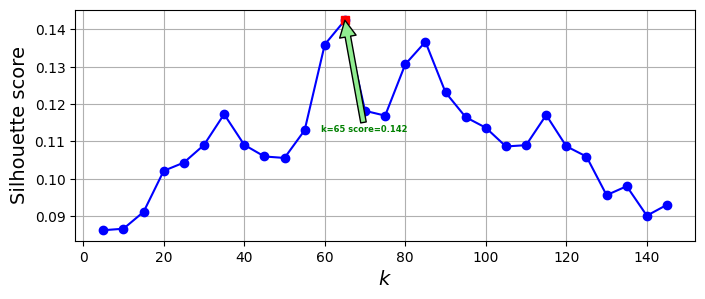

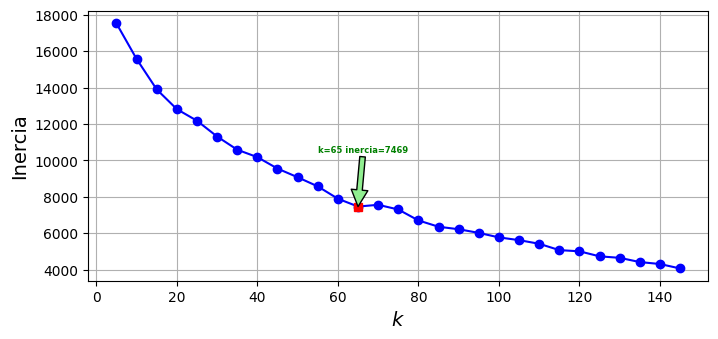

In [18]:
best_model2 = optimize_cluster_num(init_val = "random", n_init_val = 1)

Obtenemos $k=65$ con score=$0.142$. Bastane peor, además la inercia es bastante alta también, en comparación con el primer modelo. Por último probamos random con `n_init`=10.


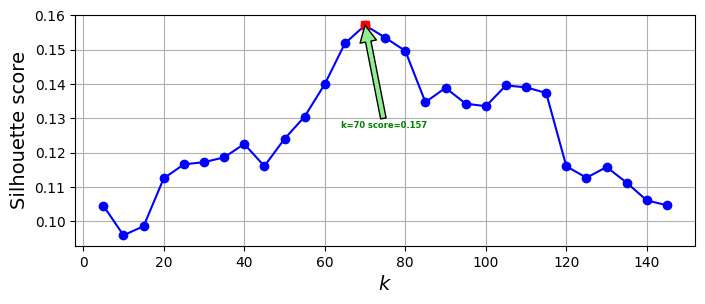

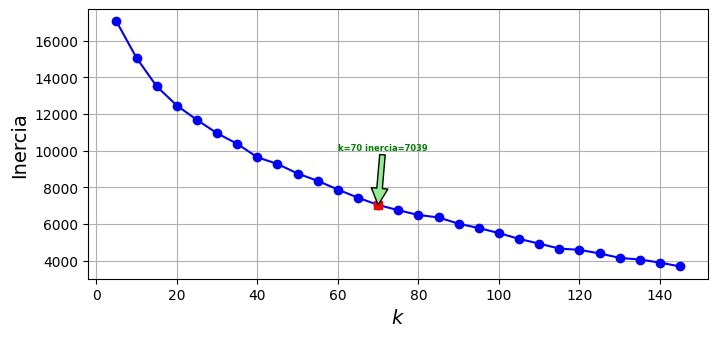

In [19]:
best_model3 = optimize_cluster_num(init_val = "random", n_init_val = 10)

Obtenemos $k=70$ con score=$0.157$. Con un número de inicializaciones mayor que el modelo anterior, es esperable que sea mejor, pero sigue siendo bastante malo en comparación con el primer modelo. Queda claro que la inicialización inteligente mejora mucho el resultado. Aunque también se nota que tarda más el algoritmo. Nos quedamos por lo tanto con el primer modelo. El criterio que se ha usado para decidir ha sido el silhouette score, que ya hemos visto en apartados anteriores que es una buena medida de la calidad del modelo. Además la inercia también es bastante alta en los otros dos modelos. Vamos a visualizar los clusteres usando la función que tenemos dada al principio del ejercicio.

In [20]:
best_model = best_model1
# Recorremos clusteres
for cluster_id in np.unique(best_model.labels_):
    print("Cluster", cluster_id)
    # Ejemplos que pertenecen al cluster
    in_cluster = best_model.labels_==cluster_id
    faces = X_train[in_cluster]
    labels = y_train[in_cluster]
    plot_faces(faces, labels)

Output hidden; open in https://colab.research.google.com to view.

Aunque hay bastante clusteres con la misma persona, también hay muchos con solo una persona o con varios intrusos. Parece que no va muy bien el modelo. Veamos como predice el conjunto de test. Para eso predecimos el test, y para cada ejemplo de test pintamos la imagen junto con todas las imagenes del cluster al que ha sido asignado el ejemplo.

In [21]:
y_pred = best_model.predict(X_test_pca)
for i, y in enumerate(y_pred):
  print("Cluster", y)
  faces = np.array([X_test[i]])
  labels = np.array([y_test[i]])
  plot_faces(faces, labels)

  # Ejemplos que pertenecen al cluster
  in_cluster = best_model.labels_==y
  faces = X_train[in_cluster]
  labels = y_train[in_cluster]
  plot_faces(faces, labels)

Output hidden; open in https://colab.research.google.com to view.

En general parece que tiene sentido, se suelen clasificar bien las imagenes, pero hay errores. La conclusión que podemos hacer es que k-medias no va muy bien en nuestro caso. Los clusteres a menudo tienen intrusos o consisten de una sola persona. Quizá es preferible optar por otras opciones.

### <font color='blue'>Ejercicio 1.B: Utilización de DBSCAN (1 punto)</font>

<font color='blue'> En este ejercicio haremos algo similar a lo realizado en el anterior, pero ahora con otro problema sintético en 2D y el algoritmo DBSCAN. Para crear el conjunto sintético haremos uso de la función `make_moons` dentro del paquete de `sklearn.datasets`. Crearemos un conjunto sintético de $1.000$ puntos con una tasa de ruido de $0.05$.


<font color='blue'> Las tareas a realizar a realizar en este ejercicio se resumen a continuación:
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.
    
<font color='blue'> El alumnado debe describir en detalle el trabajo realizado y las conclusiones extraídas.



---



<font color='blue'>
1. A partir del conjunto de datos especificado, ajusta un algoritmo DBSCAN con los hiperparámetros por defecto (5 mínimas muestras por cluster). Identifica los índices de los ejemplos núcleo (_core points_)) e imprime sus coordenadas. Para ello, emplea las variables de instancia `core_sample_indices_` y `components_`, respectivamente.

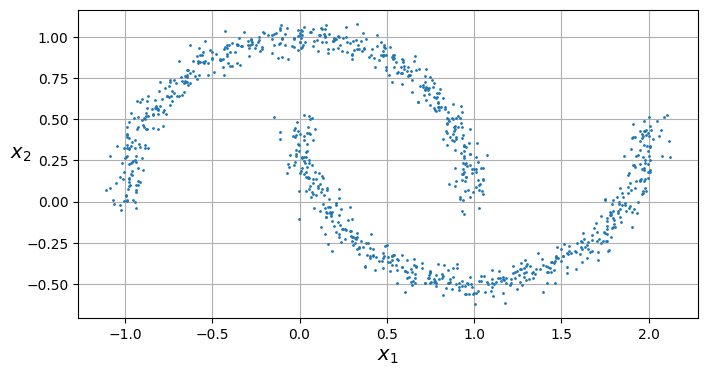

Índices (20 primeros): 
[ 0  4  5  6  7  8 10 11 12 13 14 16 17 18 19 20 21 22 23 24]
Coordenadas:
[[-0.02137124  0.40618608]
 [-0.84192557  0.53058695]
 [ 0.58930337 -0.32137599]
 ...
 [ 1.66258462 -0.3079193 ]
 [-0.94355873  0.3278936 ]
 [ 0.79419406  0.60777171]]


In [22]:
#Apartado 1
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

#A CUBRIR POR EL ALUMNADO
# Ajusto por defecto
dbscan = DBSCAN(eps=0.05)
dbscan.fit(X)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()
print("Índices (20 primeros): ")
print(dbscan.core_sample_indices_[:20])
print("Coordenadas:")
print(dbscan.components_)

<font color='blue'>
2. La variable de instancia `labels_` contiene el núcleo al que pertenece cada ejemplo
del conjunto de datos. Observa que algunas instancias tienen un índice de cluster
igual a -1, lo que significa que el algoritmo las considera anomalías. En un conjunto
sencillo como este, en un principio, no debería haber anomalías. El hiperparámetro `eps` indica la distancia
máxima entre dos muestras para que una se considere vecina de la otra (no se trata de un
límite máximo de las distancias de los puntos dentro de un cluster). Es el hiperparámetro
de DBSCAN más importante que debes elegir adecuadamente para tu conjunto de datos y
función de distancia. Ajusta 4 modelos de DBSCAN con el hiperparámetro $eps$ igual a
$\{0.01,0.02,0.05,0.1\}$. Dibuja una representación de los clústers para cada modelo
identificando las anomalías que tiene en el gráfico y dando el porcentaje de anomalías
de cada modelo. Analiza y explica los resultados obtenidos.

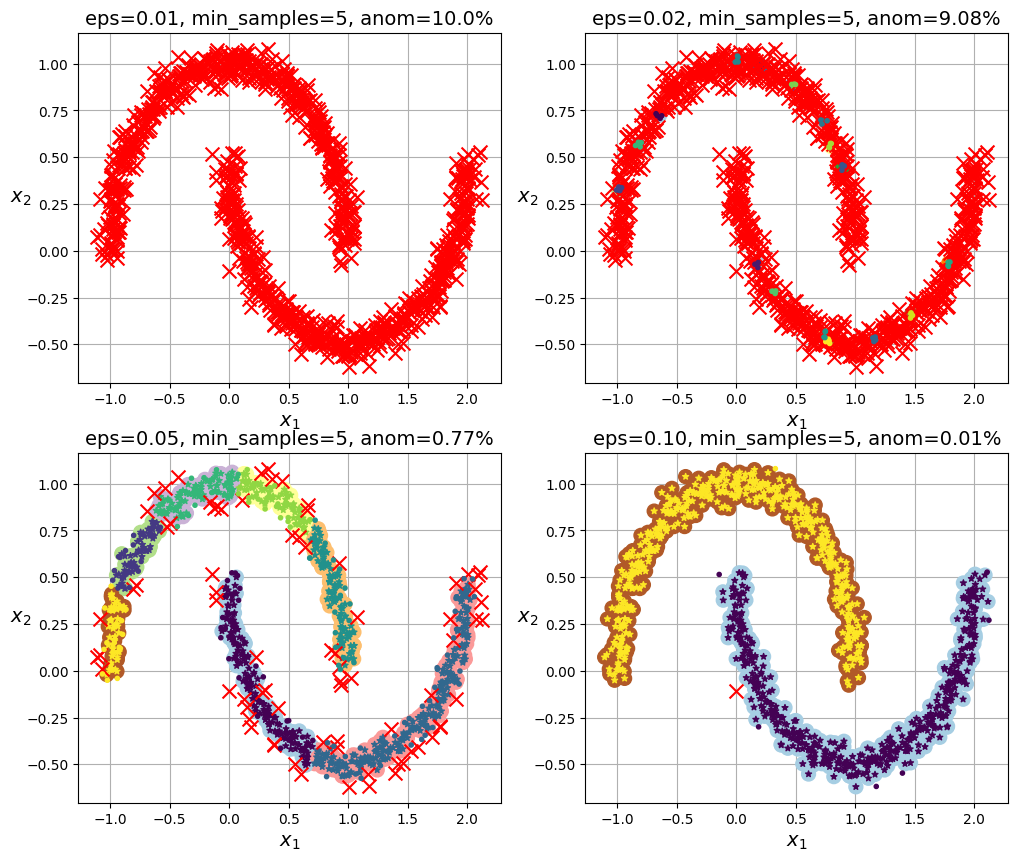

In [23]:
#Apartado 2
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True, anom_rate = 0):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}, anom={anom_rate}%")
    plt.grid()
    plt.gca().set_axisbelow(True)

#A CUBRIR POR EL ALUMNADO
plt.figure(figsize=(12, 10))
epsilons = [0.01, 0.02, 0.05, 0.1]
dbscans_per_eps = []
for i, epsil in enumerate(epsilons):
  dbscan = DBSCAN(eps=epsil)
  dbscan.fit(X)
  dbscans_per_eps.append(dbscan)
  # Calculo porcentaje de anomalías, cuento cuantos tienen label -1
  anom = len(X[dbscan.labels_ == -1])/100
  plt.subplot(2, 2, i+1)
  plot_dbscan(dbscan, X, size=100, anom_rate = anom) # Función que pinta

plt.show()


Como podemos ver, a medida que vamos incrementando el epsilon, disminuye el porcentaje de anomalías considerablemente. Eso es debido a que si cogemos un vecindario muy pequeño, es inevitable que tengamos muchas anomalías. Por lo tanto la clave está en escoger un epsilon lo suficientemente grande para que agrupe bien los ejemplos del mismo cluster, pero no tan grande como para que los agrupo junte con todos los de otro cluster. Es decir, tenemos que definir bien la medida de "cercanía" en este algoritmo.

Finalmente, podemos ver como el dbscan con epsilon mayor es el que mejor agrupa. Solo hay una anomalía, que realmente podría desaparecer si incrementamos el epsilon un pelín más, ya que se ve que los dos clusters están bastante lejos el uno del otro y este incremento no debería tener consecuencias negativas.

<font color='blue'>
3. Sorprendentemente, la clase DBSCAN no tiene un método `predict()`,
aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir
a qué cluster pertenece una nueva instancia. Esta decisión se tomó porque diferentes
algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los
autores decidieron dejar que el usuario eligiera cuál utilizar. Pero sí se puede usar
un clasificador para ver en qué cluster está cada punto nuevo. Hazlo con un clasificador
kNN con un vecindario de 30 vecinos, usando el mejor modelo del apartado anterior y utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas. Obtén el cluster asociado y la probabilidad para los
siguientes 4 ejemplos `[[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]]`.
Junto con lo anterior, dibuja un gráfico que represente los bordes de decisión y aplica también k-means sobre los mismo datos. Analiza las diferencias entre dichas fronteras de decisión en base al funcionamiento y naturaleza de los dos algoritmos subyacentes.

Clusteres predecidos:
[1 0 1 0]
Probabilidades de pertenencia:
[[0.1 0.9]
 [1.  0. ]
 [0.  1. ]
 [1.  0. ]]


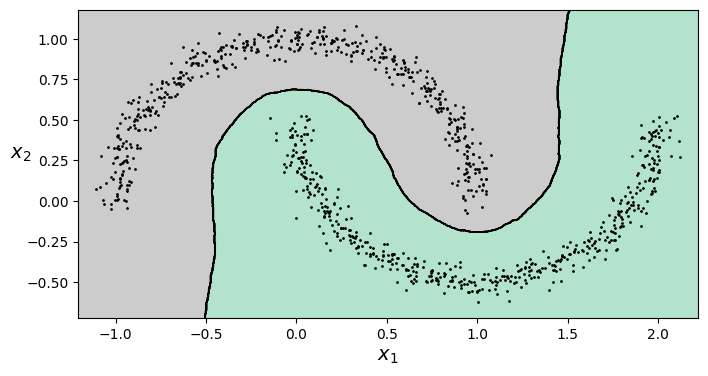

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


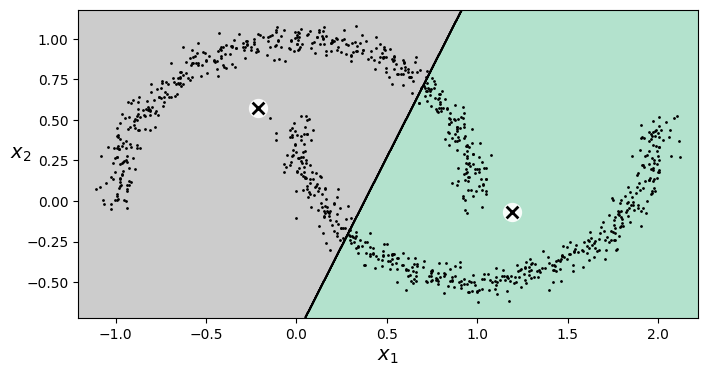

In [24]:
#Apartado 3
from sklearn.neighbors import KNeighborsClassifier

#A CUBRIR POR EL ALUMNADO
dbscan = dbscans_per_eps[-1] # Mejor modelo dijimos que era el último

# Ajustamos KNN con las coordenadas de los core points y sus respectivos
# labels como etiquetas
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

# Predecimos datos nuevos
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
print("Clusteres predecidos:")
print(knn.predict(X_new))
print("Probabilidades de pertenencia:")
print(knn.predict_proba(X_new))

# Pintamos frontera de decisión para dbscan
plt.figure(figsize=(8, 4))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.show()

# Entrenamos kmeans y pintamos frontera
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(X) # Ajustamos
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

En efecto, obtenemos que la frontera de decisión del dbscan separa bien los dos clusteres, ya que los dos son densos y no tienen prácticamente nada en medio. En cambio kmeans no se comporta bien, ya que los clusteres no tienen forma esférica y están "enganchados", forzando al algoritmo separarlos de forma tajante y sacrificando parte de cada cluster. Como conclusión se podría decir que este ejemplo de dataset es típico en el que dbscan funciona bien y kmeans no.

## <font color='blue'>Ejercicio 2: PROBLEMA DE AGRUPAMIENTO (5 puntos)</font>

<font color='blue'> Para la realización de este ejercicio, se ha seleccionado el dataset denominado "Anuran Calls (MFCCs)" [1] (https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs). Este conjunto de datos describe las características sonoras de los cantos de diferentes especies de anfibios del orden Anura, cuyos integrantes coloquialmente son conocidos como ranas o sapos.

<font color='blue'> Se encuentran representados por medio de los coeficientes cepstrales en las frecuencias de Mel ([_Mel-frequency cepstral coefficients_](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum), MFCCs), que son en esencia, una representación abstracta de una señal de audio obtenida al aplicar una transformada del coseno discreta a un espectrograma de Mel, es decir, una representación  de las frecuencias auditivas que son capaces de captar los humanos. Debido a ser una representación compacta del [espectrograma](https://en.wikipedia.org/wiki/Spectrogram), manteniendo las características más importantes del audio, se utiliza de forma regular en procesado del habla y aplicaciones de aprendizaje automático en procesado de señales de audio [2].

<font color='blue'> El dataset, creado por investigadores de la Universidad Federal del Amazonas en Brasil, contiene individuos de 10 especies, también incluyéndose su género y familia taxonómica, con el objetivo original de lograr realizar una clasificación multiclase de las especies de anuros que fueron grabados en los terrenos de la Universidad, así como de Mata atlántica (Brasil) y Córdoba (Argentina) en condiciones reales, es decir, con ruido de fondo.
    
<font color='blue'> Este conjunto de datos se utilizó en varias tareas de clasificación relacionadas con el reto del reconocimiento de especies de anuros a través de sus llamadas. Se trata de un conjunto de datos multietiqueta con tres columnas de etiquetas. Este conjunto de datos se creó segmentando 60 registros de audio pertenecientes a 4 familias diferentes, 8 géneros y 10 especies. Cada audio corresponde a un espécimen (una rana individual), el ID del registro también se incluye como columna adicional. Se utilizaron la entropía espectral y un método de cluster binario para detectar los fragmentos de audio pertenecientes a cada sonido. La segmentación y la extracción de características se realizaron en Matlab. Tras la segmentación se obtuvieron 7195 sílabas, que se convirtieron en instancias para entrenar y probar el clasificador.

<font color='blue'> Resulta entonces interesante saber si las clasificaciones taxonómicas realizadas tienen sentido en cuanto a los datos, es decir, ¿realmente se corresponden de cierta forma los distintos cantos de los anuros con la clasificación que poseen actualmente? ¿O existen especies que, siendo de diferentes grupos taxonómicos, poseen un canto indistinguible?

### <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente trabajo es analizar los patrones de los datos, sin tomar en cuenta su _ground truth_, para determinar si la clasificación taxonómica actual corresponde razonablemente con una diferencia en los cantos. Claro está que este estudio representará un análisis superficial del problema, pero al menos sí podrá servir de base para estudiar si podemos determinar una taxonomía aproximada de los anuros.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.
2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.
4. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

### <font color='blue'> Hipótesis
<font color='blue'>Sobre los datos se pueden realizar las siguientes hipótesis:
- <font color='blue'>Los datos, siendo grabaciones que incluyen el ruido de fondo, poseerán una cantidad significativa de _outliers_.
- <font color='blue'>Será posible, al menos en parte, observar cierta "agrupación" en los datos a simple vista.
- <font color='blue'>Existirá cierta correlación entre los _MFCCs_ debido a que provienen de una misma grabación, por lo que ciertas columnas/características crecerán o disminuirán de forma conjunta. En otras palabras, como el dispositivo empleado para adquirir sonidos es el mismo para todas las pistas de audio (7195), es razonable pensar que si algún _MFCC_ presenta algún problema, o atenuación de algún tipo, dicha particularidad podrá estar presente en todas las instancias/observaciones.  

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan del clustering sean razonablemente parecidos a la realidad. Es decir, se espera que el agrupamiento encontrado tenga algún tipo de relación con alguna de las últimas 4 columnas de los datos (_Family_, _Genus_, _Species_ o _RecordID_).

### <font color='blue'> Bibliografía

<font color='blue'><font color='blue'>[1] E. N. Juan Colonna, “Anuran Calls (MFCCs).” UCI Machine Learning Repository, 2015. doi: 10.24432/C5CC9H. https://archive.ics.uci.edu/dataset/406/anuran+calls+mfccs

<font color='blue'>[2] “3.8. The cepstrum, mel-cepstrum and mel-frequency cepstral coefficients (MFCCs) — Introduction to Speech Processing.” Accessed: Jan. 13, 2024. [Online]. Available: https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html#the-cepstrum




In [25]:
#Para acceder a nuestros ficheros de Google Drive
from google.colab import drive
drive.mount('/content/drive')
# La carpeta 'clasificacion' (que contiene optdigits.tes, optdigits.tra, optdigits.names)
# debe estar en vuestro Drive, dentro de la carpeta 'Colab Notebooks'

Mounted at /content/drive


In [26]:
dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df_frogs = pd.read_csv(dataFolder + "/dataset/Frogs_MFCCs.csv")
df_frogs

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


#### <font color='blue'> 1.  Realización de un análisis exploratorio de los datos para una primera observación de las distribuciones de los cantos.

In [28]:
#A CUBRIR POR EL ALUMNADO
df_frogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

Como podemos ver, no tenemos valores perdidos ni nulos. Vemos que las etiquetas son de tipo `object`. Ahora quiero ver cuantos elementos únicos hay por columna. En particular quiero ver también si concuerda el número de Familias, Géneros y Especies con el enunciado.

In [29]:
df_frogs.nunique()

MFCCs_ 1     249
MFCCs_ 2    7140
MFCCs_ 3    7026
MFCCs_ 4    7175
MFCCs_ 5    7195
MFCCs_ 6    7195
MFCCs_ 7    7195
MFCCs_ 8    7195
MFCCs_ 9    7195
MFCCs_10    7195
MFCCs_11    7195
MFCCs_12    7195
MFCCs_13    7195
MFCCs_14    7195
MFCCs_15    7195
MFCCs_16    7195
MFCCs_17    7195
MFCCs_18    7195
MFCCs_19    7195
MFCCs_20    7195
MFCCs_21    7195
MFCCs_22    7195
Family         4
Genus          8
Species       10
RecordID      60
dtype: int64

Parece que tiene sentido. Veamos un resumen estadístico.

In [30]:
df_frogs.describe()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,RecordID
count,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,...,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000,7195.000000
mean,0.989885,0.323584,0.311224,0.445997,0.127046,0.097939,-0.001397,-0.000370,0.128213,0.055998,...,-0.039244,-0.101748,0.042062,0.088680,0.007755,-0.049474,-0.053244,0.037313,0.087567,25.220014
std,0.069016,0.218653,0.263527,0.160328,0.162722,0.120412,0.171404,0.116302,0.179008,0.127099,...,0.152515,0.187618,0.119915,0.138055,0.084733,0.082546,0.094181,0.079470,0.123442,13.214399
min,-0.251179,-0.673025,-0.436028,-0.472676,-0.636012,-0.410417,-0.538982,-0.576506,-0.587313,-0.952266,...,-0.590380,-0.717156,-0.498675,-0.421480,-0.759322,-0.680745,-0.361649,-0.430812,-0.379304,1.000000
25%,1.000000,0.165945,0.138445,0.336737,0.051717,0.012581,-0.125737,-0.063109,0.004648,-0.001132,...,-0.132980,-0.255929,-0.019549,-0.001764,-0.042122,-0.106079,-0.120971,-0.017620,0.000533,15.000000
50%,1.000000,0.302184,0.274626,0.481463,0.161361,0.072079,-0.052630,0.013265,0.189317,0.063478,...,-0.050715,-0.143259,0.041081,0.112769,0.011820,-0.052626,-0.055180,0.031274,0.105373,22.000000
75%,1.000000,0.466566,0.430695,0.559861,0.222592,0.175957,0.085580,0.075108,0.265395,0.117725,...,0.039157,0.017348,0.107046,0.201932,0.061889,0.006321,0.001342,0.089619,0.194819,37.000000
max,1.000000,1.000000,1.000000,1.000000,0.752246,0.964240,1.000000,0.551762,0.738033,0.522768,...,0.575749,0.668924,0.670700,0.681157,0.614064,0.574209,0.467831,0.389797,0.432207,60.000000


En general no se observa nada interesante. Excepto que el primer atributo tiene muchos valores 1, tantos que hasta el percentil 25 es 1 y la media muy cercana a 1. La desviación estandar es muy pequeña también. Vamos a pintar un histograma por cada atributo numérico para visualizar los datos.

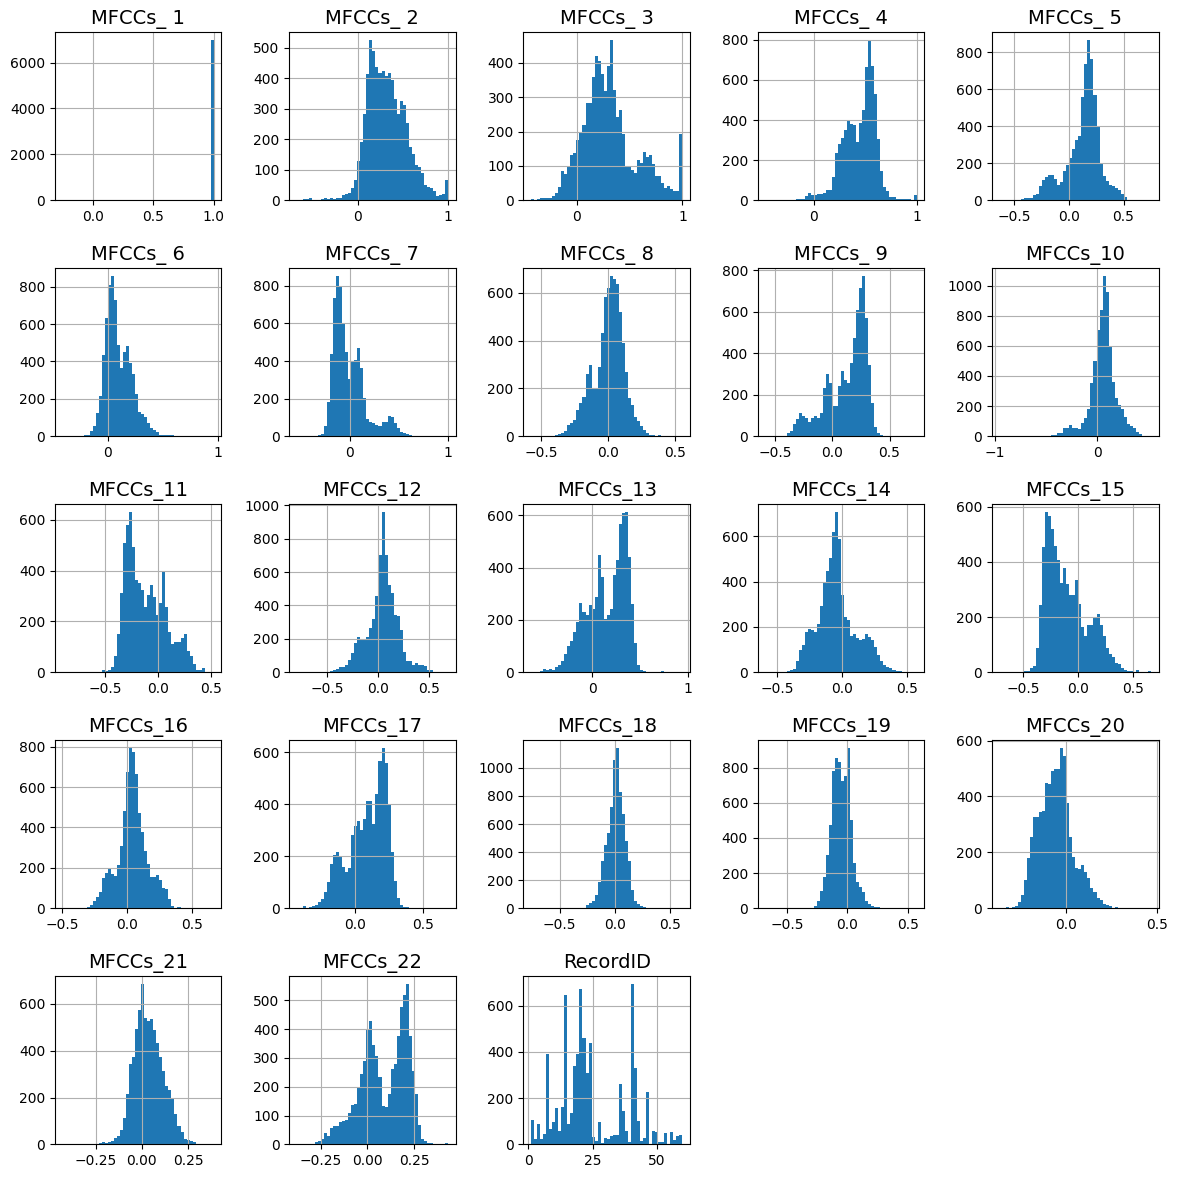

In [31]:
df_frogs.hist(bins=50, figsize=(12, 12))
plt.tight_layout()
plt.show()

Parece que algunos tienen distribución normal. Se ve también que el primer atributo es prácticamente siempre 1. Vamos a ver ahora cuantos representantes de cada familia, género y especie tenemos.

In [32]:
print(df_frogs["Family"].value_counts())
print(df_frogs["Genus"].value_counts())
print(df_frogs["Species"].value_counts())

Family
Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: count, dtype: int64
Genus
Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: count, dtype: int64
Species
AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: count, dtype: int64


Vemos que está bastante desequilibrado. Lo vemos mejor con un histograma.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Leptodactylidae'),
  Text(1, 0, 'Hylidae'),
  Text(2, 0, 'Dendrobatidae'),
  Text(3, 0, 'Bufonidae')])

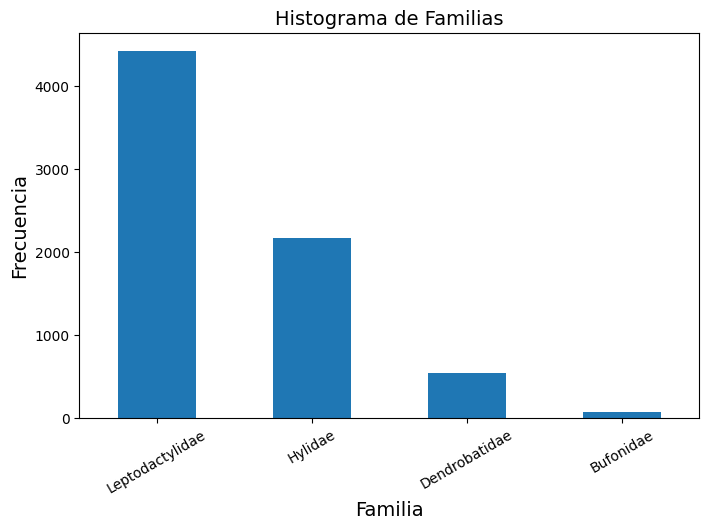

In [33]:
df_frogs["Family"].value_counts().plot(kind='bar', figsize=(8, 5))

plt.title('Histograma de Familias')
plt.xlabel('Familia')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Adenomera'),
  Text(1, 0, 'Hypsiboas'),
  Text(2, 0, 'Ameerega'),
  Text(3, 0, 'Dendropsophus'),
  Text(4, 0, 'Leptodactylus'),
  Text(5, 0, 'Scinax'),
  Text(6, 0, 'Osteocephalus'),
  Text(7, 0, 'Rhinella')])

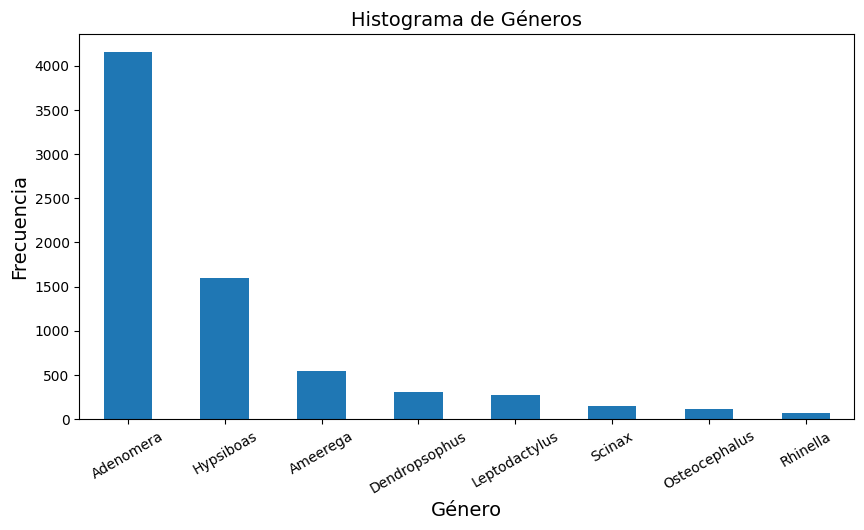

In [34]:
df_frogs["Genus"].value_counts().plot(kind='bar', figsize=(10, 5))

plt.title('Histograma de Géneros')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

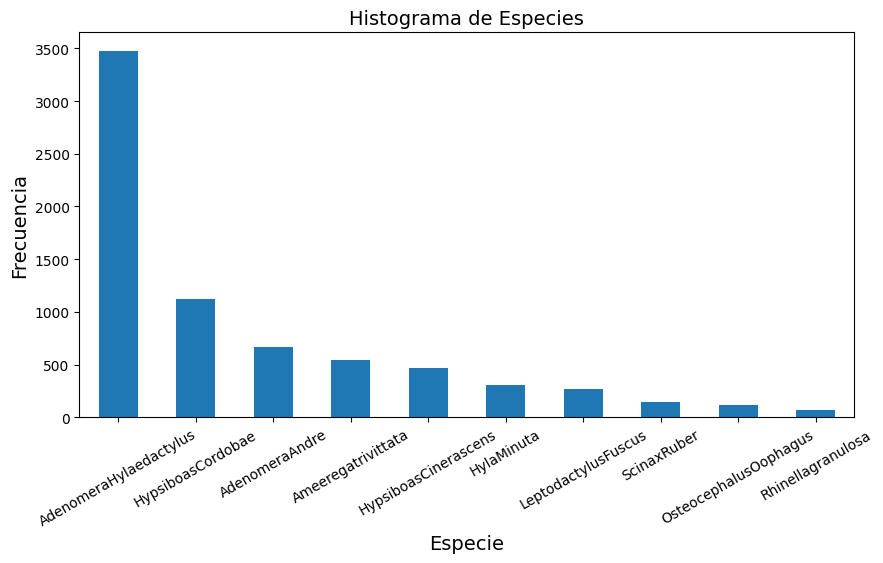

In [35]:
df_frogs["Species"].value_counts().plot(kind='bar', figsize=(10, 5))

plt.title('Histograma de Especies')
plt.xlabel('Especie')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30)

plt.show()

Vamos a separar los atributos de las etiquetas y pintar boxplots para los atributos.

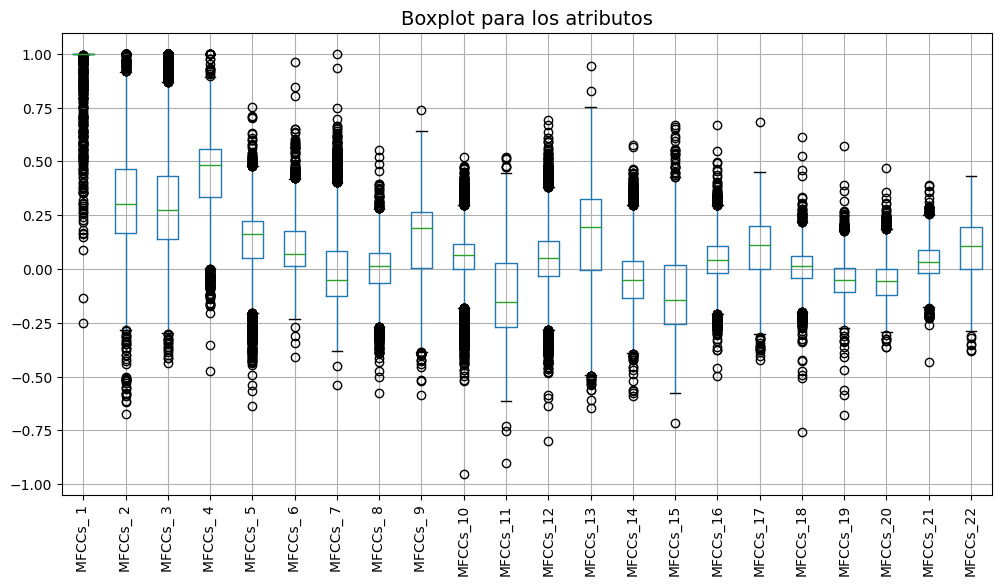

In [36]:
labels_list = ["Family", "Genus", "Species", "RecordID"]
df_frogs_train = df_frogs.drop(labels_list, axis=1)
df_frogs_labels = df_frogs[labels_list].copy()

# Genera el boxplot para los atributos
plt.figure(figsize=(12, 6))
df_frogs_train.boxplot()
plt.title('Boxplot para los atributos')
plt.xticks(rotation=90)
plt.show()

Vemos que algunos atributos se dispersan más que otros, como 2, 3, 11 y 13. En general se observan bastantes outliers.

#### <font color='blue'> 2. Detección y eliminación de _outliers_ así como las transformaciones necesarias para que los datos sean lo más "correctos" para los métodos de _clustering_.


Ahora preprocesamos con `RobustScaler`, que es un escalado mejor para datos con muchas anomalías, `PCA` para reducir dimensionalidad y también porque queremos aplicar `LocalOutlierFactor` para detectar anomalías, que funciona mejor cuando hay menor dimensionalidad.
Al usar `LocalOutlierFactor` hemos usado valores por defecto, en particular una contaminación del 10% que se podría decir que es un valor aceptable.

`RobustScaler` calcula la mediana de cada característica, que es menos sensible a los valores atípicos que la media. Luego calcula el rango intercuartil (IQR) de cada característica y resta la mediana de cada característica y divide por el IQR. Esto ajusta los datos para que tengan una mediana de cero y un rango intercuartil de uno. En general, `RobustScaler`es resistente a los valores atípicos en los datos debido a que utiliza la mediana y el rango intercuartil en lugar de la media y la desviación estándar. Los valores atípicos tienen un impacto limitado en la mediana y el IQR, lo que hace que el escalado sea más robusto frente a valores extremos.

In [37]:
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

# Escalado
scaler = RobustScaler()
scaled_features = scaler.fit_transform(df_frogs_train)

# PCA manteniendo 95% de varianza
pca = PCA(n_components=0.95)
pca_features = pca.fit_transform(scaled_features)

# LOF para detectar anomalías
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
outlier_predictions = lof.fit_predict(pca_features)

# Elimino anomalías
preprocessed = pca_features[outlier_predictions == 1]
df_frogs_labels_no_outliers = df_frogs_labels[outlier_predictions == 1].reset_index(drop=True)

print("DataFrame original:", df_frogs.shape)
print("DataFrame después de preprocesado:", preprocessed.shape)
print("Etiquetas después de eliminar anomalías:", df_frogs_labels_no_outliers.shape)


DataFrame original: (7195, 26)
DataFrame después de preprocesado: (6475, 11)
Etiquetas después de eliminar anomalías: (6475, 4)


#### <font color='blue'> 3. Experimentación y determinación de los algoritmos y métricas intrínsecas más acordes a los datos. El alumnado debe experimentar con, al menos, dos algoritmos diferentes de _clustering_.

Probamos un `KMeans`, calculando el número adecuado de clusteres que maximiza el silhouette score, como en el ejercicio 1.

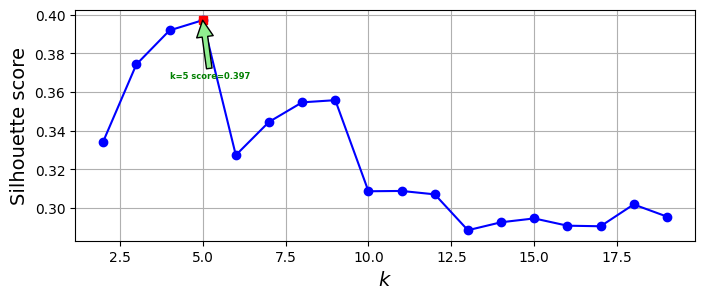

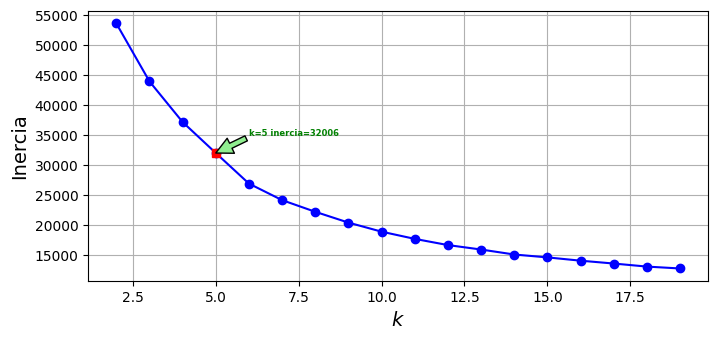

In [38]:
k_range = range(2, 20)  # Rango
kmeans_per_k = [] # Vector con los kmeans
# Entreno modelo
for k in k_range:
  kmeans = KMeans(n_clusters=k, n_init=10,
                  algorithm = "elkan", random_state=42)
  kmeans.fit(preprocessed)
  kmeans_per_k.append(kmeans)

# Calculo silhouette scores
silhouette_scores = [silhouette_score(preprocessed, model.labels_)
                    for model in kmeans_per_k]
# Encuentro mejor
best_index = np.argmax(silhouette_scores)
best_k = k_range[best_index]
best_score = silhouette_scores[best_index]
best_rounded = '%.3f' % round(best_score,3)
best_kmeans = kmeans_per_k[best_index]

# Pinto
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.annotate(f"k={best_k} score={best_rounded}", xy=(best_k, best_score),
        xytext=(best_k-1,best_score-0.03), color="green", weight="heavy",
        fontsize=6, arrowprops={"facecolor": "lightgreen"})
plt.grid()
plt.show()

# Calculo inercias
inertias = [model.inertia_ for model in kmeans_per_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inercia")
plt.plot(best_k, best_inertia, "rs")
plt.annotate(f"k={best_k} inercia={round(best_inertia)}", xy=(best_k, best_inertia),
        xytext=(best_k+1,best_inertia+3000), color="green", weight="heavy",
        fontsize=6, arrowprops={"facecolor": "lightgreen"})
plt.grid()
plt.show()

Obtenemos que el mejor número de clusters es $5$ con silhouette score $0.397$. Ahora vamos a ver si el clustering se parece a la realidad. Para eso usaremos métricas extrínsecas usando el ground truth que tenemos, es decir las etiquetas familia, género, especie y recordID.
Se usarán las siguientes métricas:
1. **Adjusted Rand Index**: Mide la similitud entre dos clusters considerando todos los posibles pares de puntos. Un valor de 1 indica una correspondencia perfecta entre las etiquetas verdaderas y las predichas, mientras que un valor cercano a 0 sugiere una asignación al azar.
2. **Normalized Mutual Information (NMI)**: Mide la cantidad de información compartida entre las etiquetas verdaderas y las etiquetas de los clusters. Un valor de 1 indica que las agrupaciones son exactamente iguales, mientras que 0 indica que no hay información compartida.
3. **Homogeneity**: Evalúa si todos los puntos de un cluster tienen la misma etiqueta verdadera. Un valor de 1 indica que todos los clusters son homogéneos (es decir, contienen solo un tipo de etiqueta verdadera).
4. **Completeness**: Evalúa si todos los puntos que tienen la misma etiqueta verdadera están en el mismo cluster. Un valor de 1 indica que todos los puntos con la misma etiqueta verdadera están completamente agrupados en un solo cluster.
5. **V-Measure**: Es la media armónica de homogeneidad y completitud. Un valor de 1 indica que las agrupaciones son perfectamente homogéneas y completas.

Se agregará toda la información en una tabla por comodidad.

In [39]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_completeness_v_measure
from tabulate import tabulate

def calculate_metrics(true_labels, predicted_labels):
    """
    Calcular métricas de evaluación para clustering.

    Parameters:
    - true_labels: Etiquetas reales de los datos.
    - predicted_labels: Etiquetas de clusters predichas.

    Returns:
    - Lista de listas: Valores de métricas para cada etiqueta.
    """

    # Inicializar listas para almacenar los valores de las métricas
    aris = []
    nmis = []
    homogeneities = []
    completitudes = []
    v_measures = []

    # Calcular métricas para cada etiqueta
    for label in true_labels.columns:
        true_label = true_labels[label]

        # Índice de Rand Ajustado (ARI)
        ari = adjusted_rand_score(true_label, predicted_labels)
        aris.append(ari)

        # Información Mutua Normalizada (NMI)
        nmi = normalized_mutual_info_score(true_label, predicted_labels)
        nmis.append(nmi)

        # Homogeneidad, Completitud, V-Measure
        homogeneity, completeness, v_measure = homogeneity_completeness_v_measure(true_label, predicted_labels)
        homogeneities.append(homogeneity)
        completitudes.append(completeness)
        v_measures.append(v_measure)

    # Crear una lista de listas con los valores de las métricas
    metrics = list(zip(true_labels.columns, aris, nmis, homogeneities, completitudes, v_measures))

    return metrics

true_labels = df_frogs_labels_no_outliers[labels_list]
predicted_labels = best_kmeans.labels_

metrics = calculate_metrics(true_labels, predicted_labels)

headers = ["Etiqueta", "ARI (Adjusted Rand Index)", "NMI (Normalized Mutual Information)",
           "Homogeneity", "Completeness", "V-Measure"]

# Tabla usando tabulate
print(tabulate(metrics, headers=headers))

Etiqueta      ARI (Adjusted Rand Index)    NMI (Normalized Mutual Information)    Homogeneity    Completeness    V-Measure
----------  ---------------------------  -------------------------------------  -------------  --------------  -----------
Family                         0.534322                               0.46523        0.569816        0.393082     0.46523
Genus                          0.613853                               0.536823       0.547086        0.526938     0.536823
Species                        0.847688                               0.731182       0.651987        0.832275     0.731182
RecordID                       0.142518                               0.513987       0.35132         0.957175     0.513987


Como podemos ver, el clustering para Familias no es muy bueno, más bien moderado. Algo mejor para Géneros, con un ARI algo más alto, es decir que el clustering es bastante parecido a la agrupación por etiquetas de Género. En cuanto a Especies, se ve que agrupa bastante bien. El ARI es muy alto, el NMI también, luego hay bastante información compartida entre predicciones y etiquetas reales. La completitud es bastante alta, luego hemos conseguido agrupar ejemplos con misma etiqueta en un mismo cluster. Y como la homogeneidad es moderadamente buena, la V-Measure sale buena, lo cual significa que hemos conseguido agrupar bien ejemplos con mismas etiquetas en un cluster, y que los clusteres suelen tener más ejemplos de una sola etiqueta. El RecordID ya no va tan bien, aunque tiene una completitud extremadamente alta. Es decir que hemos conseguido agrupar bien los ejemplos del mismo RecordID en un solo cluster. Pero como la homogeneidad es baja, significa que los clusteres tienen mezclas de ejemplos de distintos RecordID, lo cual tiene sentido, ya que tenemos 60 RecordID distintos y solo 5 clusters.

En resumen, parece que se agrupa bien por Especie, al menos para el modelo `KMeans`.

Ahora probamos `DBSCAN`, usando silhouette score como métrica para decidir qué valores de los parámetros `eps` y `min_samples` son mejor.

In [40]:
# Rango de parámetros a probar
eps_range = np.arange(0.1, 1.5, 0.1)
min_samples_range = range(2, 10)

best_silhouette = -1
best_params = {}

# Evaluar combinaciones de parámetros
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(preprocessed)

        # Solo considerar combinaciones con más de un cluster
        if len(set(labels)) > 1 and -1 in labels:
            silhouette = silhouette_score(preprocessed, labels)

            if silhouette > best_silhouette:
                best_silhouette = silhouette
                best_params = {'eps': eps, 'min_samples': min_samples}
                best_dbscan = dbscan

print(f"Mejores parámetros basados en Silhouette Score: eps={best_params['eps']}, min_samples={best_params['min_samples']}, Silhouette Score={best_silhouette}")

Mejores parámetros basados en Silhouette Score: eps=1.3000000000000003, min_samples=7, Silhouette Score=0.32209196475590574


Parece que los mejores son `eps`$=1.3$, `min_samples`$=7$ con `silhouette score`$=0.322$. Ahora evaluamos con métricas extrínsecas y de paso vemos cuantos clústeres nos encuentra `DBSCAN`.

In [41]:
# Determinar el número de clusters
# Excluyo anomalias (-1) si las hay
predicted_labels = best_dbscan.labels_
num_clusters = len(set(predicted_labels)) - (1 if -1 in predicted_labels else 0)
print(f"Número de clusters encontrados: {num_clusters}")

# Metricas
metrics = calculate_metrics(true_labels, predicted_labels)
print(tabulate(metrics, headers=headers))

Número de clusters encontrados: 16
Etiqueta      ARI (Adjusted Rand Index)    NMI (Normalized Mutual Information)    Homogeneity    Completeness    V-Measure
----------  ---------------------------  -------------------------------------  -------------  --------------  -----------
Family                         0.564189                               0.568768       0.846532        0.42825      0.568768
Genus                          0.671987                               0.67364        0.813676        0.574727     0.67364
Species                        0.912487                               0.821111       0.849125        0.794886     0.821111
RecordID                       0.16286                                0.61988        0.465065        0.929198     0.61988


Para empezar vemos que `DBSCAN` ha encontrado 16 clústeres, mucho más que `KMeans`. En cuanto a la evaluación, en general se observa una mejora en comparación con `KMeans`. Se ve a simple vista que las Especies son las que mejor se agrupan, pero además las otras etiquetas han mejorado también. Cabe mencionar también que la homogeneidad ha mejorado para Familias y Géneros, con una pequeña mejora en completitud.

Ahora vamos a usar `MeanShift`, usando `silhouette score` para encontrar el mejor valor del parámetro `bandwidth` del algoritmo.

In [42]:
from sklearn.cluster import MeanShift

# Definir el rango de valores de bandwidth
bandwidth_range = np.linspace(0.1, 2.0, 6)

best_bandwidth = None
best_silhouette = -1
best_mean_shift = None

# Evaluar cada valor de bandwidth
for bandwidth in bandwidth_range:
    mean_shift = MeanShift(bandwidth=bandwidth)
    labels = mean_shift.fit_predict(preprocessed)

    # Solo calcular el Silhouette Score si hay más de un cluster
    if len(set(labels)) > 1:
        silhouette = silhouette_score(preprocessed, labels)

        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_bandwidth = bandwidth
            best_mean_shift = mean_shift

print(f'Mejor Bandwidth: {best_bandwidth}, Mejor Silhouette Score: {best_silhouette}')

Mejor Bandwidth: 2.0, Mejor Silhouette Score: 0.31963012383395667


Vemos que `bandwidth`$=2.0$ y `silhouette score`$=0.32$. Ahora veamos cuantos clusteres hemos obtenido y como de bueno es el algoritmo.

In [43]:
# Determinar el número de clusters
predicted_labels = best_mean_shift.labels_
num_clusters = len(set(predicted_labels))
print(f"Número de clusters encontrados: {num_clusters}")

# Metricas
metrics = calculate_metrics(true_labels, predicted_labels)
print(tabulate(metrics, headers=headers))

Número de clusters encontrados: 54
Etiqueta      ARI (Adjusted Rand Index)    NMI (Normalized Mutual Information)    Homogeneity    Completeness    V-Measure
----------  ---------------------------  -------------------------------------  -------------  --------------  -----------
Family                         0.570301                               0.546933       0.879273        0.396911     0.546933
Genus                          0.689046                               0.677029       0.87561         0.55187      0.677029
Species                        0.933524                               0.822471       0.903549        0.754745     0.822471
RecordID                       0.176384                               0.643827       0.502476        0.89583      0.643827


En general se observa algo parecido que con `DBSCAN`, con pequeñas diferencias. El número de clusters es 54, bastante elevado.

Para concluir podríamos decir que efectivamente se observa una relación entre el clustering y la realidad. En particular, el clustering parece que agrupa bien ejemplos que pertenecen a la misma especie. También agrupa moderadamente bien por familias y géneros. Pero mejor por especies.

## <font color='blue'>Ejercicio 3. DETECCIÓN de ANOMALÍAS con PyOD



### <font color='blue'> Ejemplo de uso de IsolationForest en un conjunto sintético.

<font color='blue'>A continuación, se muestra un ejemplo de uso de IsolationForest (https://pyod.readthedocs.io/en/latest/_modules/pyod/models/iforest.html) en un conjunto sintético. PyOD ofrece un wrapper del Isolation Forest de scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html) con más funcionalidades.

#### <font color='blue'>Paso 1: Construimos el Modelo

<font color='blue'>Generamos $6$ variables y $500$ instancias para entrenamiento y test. Aunque los datos tienen la variable target $Y$, los modelos no supervisados solo usarán las variables $X$. La variable $Y$ es solo para validación. El porcentaje de outliers se pone al $5\%$ con `contamination=0.05`. Se dibuja un scatter plot de las dos primeras variables. Los puntos amarillos son outliers, y los puntos violeta son los datos normales.

In [44]:
!pip install pyod

from pyod.utils.data import generate_data
contamination = 0.05 # percentage of outliers
n_train = 500       # number of training points
n_test = 500        # number of testing points
n_features = 6      # number of features
X_train, X_test, y_train, y_test = generate_data(
    n_train=n_train,
    n_test=n_test,
    n_features= n_features,
    contamination=contamination,
    random_state=123)

X_train_pd = pd.DataFrame(X_train)
X_train_pd.head()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=f36baff3c3a75fe1dfafcd7d356979e655b3cc47bc1c0cdc833e1948c2f0a8f7
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


,0,1,2,3,4,5
0,2.396090,2.092611,2.073392,1.988262,1.953473,2.450997
1,1.631040,1.746182,1.898050,2.380148,1.967332,1.858916
2,1.824683,2.131412,2.028829,1.703454,2.502966,2.119108
3,2.106098,2.165173,2.340826,2.170109,1.749139,1.678661
4,1.829647,1.775596,1.829438,2.054768,1.577190,1.594549


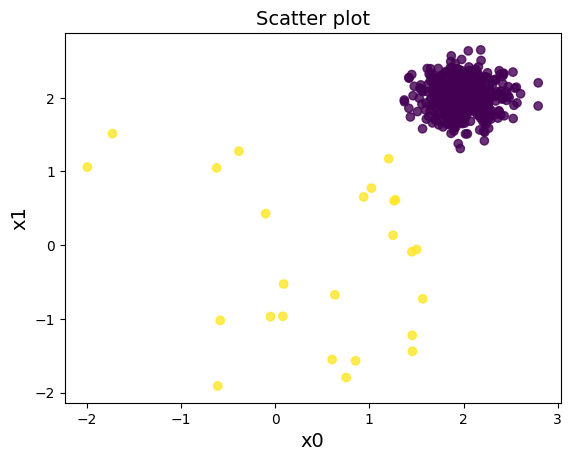

In [45]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

<font color='blue'>Declaramos y ajustamos el modelo. El tamaño de un árbol `max_samples`es de $40$ instancias. En Isolation Forest (IForest, https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.iforest), no es necesario asignar un tamaño de árbol grande, puesto que tamaños pequeños pueden producir mejores iTrees. El porcentaje de outliers será $5\%$ usando `contamination=0.05`. Si no se indica, este valor se fijará automáticamente en $10\%$.

<font color='blue'>La función `decision_function()` genera el _outlier score_ de cada ejemplo del conjunto de datos, y la función `predict()` assigna las etiquetas ($1$: outlier; $0$: no outlier) basándose en la tasa de contaminación proporcionada ($5\%$ en nuestro caso). El umbral que vemos más abajo (`threshold_`) se emplea para identificar los `n_samples*contamination` ejemplos más atípicos de acuerdo a su `decision_scores_`.

In [46]:
from pyod.models.iforest import IForest
isft = IForest(contamination=0.05, max_samples=40, behaviour='new')
isft.fit(X_train)

# Training data
y_train_scores = isft.decision_function(X_train)
y_train_pred = isft.predict(X_train)

# Test data
y_test_scores = isft.decision_function(X_test)
y_test_pred = isft.predict(X_test) # outlier labels (0 or 1)

# Threshold for the defined comtanimation rate
print("The threshold for the defined contamination rate:" , isft.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))
print("The training data:", count_stat(y_test_pred))


The threshold for the defined contamination rate: -5.937958458268611e-15
The training data: {0: 475, 1: 25}
The training data: {0: 473, 1: 27}


<font color='blue'> Vemos que, efectivamente, este número de ejemplos más atípicos se corresponde con `X_train.shape[0]*0.05`.

In [47]:
X_train.shape[0]*0.05

25.0

<font color='blue'> Vamos a intentar marcar con una cruz roja los $25$ ejemplos más atípicos en la figura.  

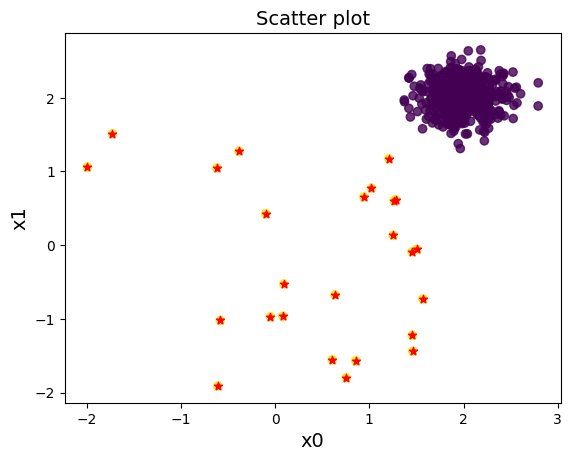

In [48]:
plt.scatter(X_train_pd[0], X_train_pd[1],c=y_train, alpha=0.8)
indexes = np.squeeze(np.array(np.where(isft.threshold_ < isft.decision_scores_)))
plt.scatter(X_train[indexes,0], X_train[indexes,1],marker='*',color='r')
plt.title('Scatter plot')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

##### <font color='blue'>Paso 1.1: Parámetros del Modelo

In [49]:
isft.get_params()

{'behaviour': 'new',
 'bootstrap': False,
 'contamination': 0.05,
 'max_features': 1.0,
 'max_samples': 40,
 'n_estimators': 100,
 'n_jobs': 1,
 'random_state': None,
 'verbose': 0}

* <font color='blue'>`max_samples` es el número de muestras a escoger en $X$ para entrenar cada estimador base.
* <font color='blue'>`n_estimators` es el número de árboles en el ensemble. El valor por defecto es de 100 árboles.
* <font color='blue'>`max_features` es el número de características a escoger en $X$ para entrenar cada estimador base. El valor por defecto es $1.0$.
* <font color='blue'>`n_jobs` es el número de tareas a ejecutar en paralelo para `fit`y `predict`. El valor por defecto es $1.0$. Si se pone a $-1$, el número de tareas se iguala al número de cores.

##### <font color='blue'>Paso 1.2: Importancia de las Variables

<font color='blue'>Debido a que IForest trabaja dentro del marco de los árboles de decisión, podemos calcular y entender la importancia relativa de las características para determinar outliers. La importancia de las características se mide por el [índice de impureza Gini](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), cuya suma es $1.0$. A mayor valor, mayor importancia tiene la característica. En nuestro caso, la primera (índice $0$) y quinta (índice $4$) características serían las más relevantes.

In [50]:
isft_vi = isft.feature_importances_
isft_vi

array([0.13322735, 0.18271343, 0.19738877, 0.16054109, 0.15652314,
       0.16960622])

In [51]:
np.sum(isft_vi)

1.0000000000000002

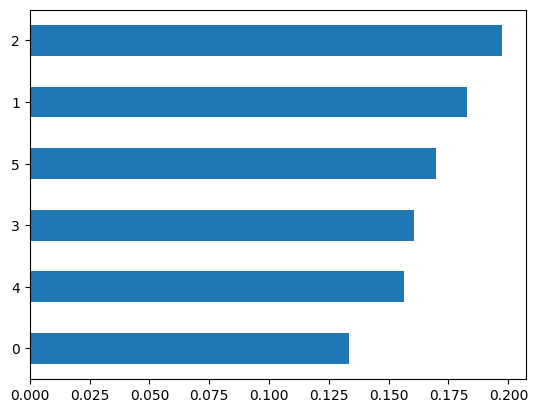

In [52]:
from matplotlib import pyplot as plt
for_plot = pd.DataFrame({'x_axis':X_train_pd.columns, 'y_axis':isft_vi}).sort_values(by='y_axis',ascending=True)
for_plot['y_axis'].plot.barh();

####<font color='blue'> Paso 2: Determinar un Umbral Razonable

<font color='blue'>El umbral se puede determinar por el histograma de los _outlier scores_. La siguiente figura sugiere un umbral alrededor de $0.0$. Esto significa que los scores de la mayoría de los datos normales son menores que $0.0$. Los scores de outlier de los datos anormales están en un rango más alto.

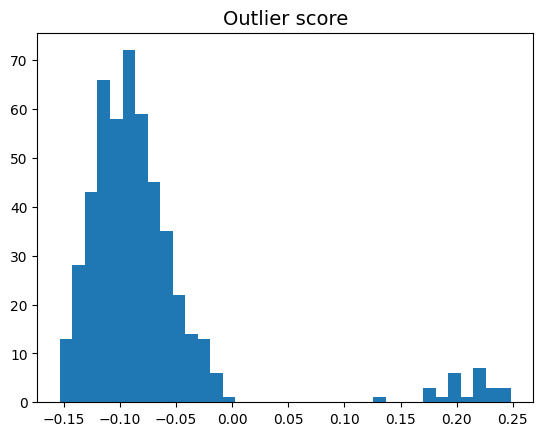

In [53]:
import matplotlib.pyplot as plt
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

#### <font color='blue'>Paso 3: análisis estadístico descriptivo

<font color='blue'>Realicemos un análisis descriptivo de los grupos normal y outlier tanto en entrenamiento como en test. En esta ocasión utilizamos directamente el threshold calculado por Isolation Forest, pero debemos ser conscientes de que podemos emplear el valor que consideremos más oportuno (en base al histograma anterior o a cualquier otra información de que dispongamos). Dicho umbral hará que cambien las tablas que se muestran a continuación. Por ejemplo, si hacemos `threshold = isft.threshold_ - 0.05` veremos que se incrementa el porcentaje de ejemplos considerados outliers (pasando del $5\%$ al $11.2\%$).

In [54]:
threshold = isft.threshold_ # Or other value from the above histogram

def descriptive_stat_threshold(df,pred_score, threshold):
    # Let's see how many '0's and '1's.
    df = pd.DataFrame(df)
    df['Anomaly_Score'] = pred_score
    df['Group'] = np.where(df['Anomaly_Score']< threshold, 'Normal', 'Outlier')

    # Now let's show the summary statistics:
    cnt = df.groupby('Group')['Anomaly_Score'].count().reset_index().rename(columns={'Anomaly_Score':'Count'})
    cnt['Count %'] = (cnt['Count'] / cnt['Count'].sum()) * 100 # The count and count %
    stat = df.groupby('Group').mean().round(3).reset_index() # The avg.
    stat = cnt.merge(stat, left_on='Group',right_on='Group') # Put the count and the avg. together
    return (stat)

descriptive_stat_threshold(X_train,y_train_scores, threshold) #y_train_scores = isft.decision_scores_

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,475,95.0,2.003,2.011,2.006,1.991,2.008,1.985,-0.091
1,Outlier,25,5.0,0.454,-0.209,-0.475,-0.231,-0.035,-0.056,0.208


In [55]:
descriptive_stat_threshold(X_test,y_test_scores, threshold)

,Group,Count,Count %,0,1,2,3,4,5,Anomaly_Score
0,Normal,473,94.6,2.019,2.013,2.008,1.989,2.005,2.002,-0.090
1,Outlier,27,5.4,0.108,-0.335,-0.020,0.083,0.113,0.246,0.192


In [56]:
X_train[y_train==1,0].mean()

0.4535480626515198

<font color='blue'>Las tablas de arriba incluyen los elementos esenciales para la evaluación del modelo e interpretación de resultados.

* <font color='blue'>Tamaño del grupo de outlier (`Count %`) de las tablas. Muestra un $5\%$ en cada caso ($5.2\%$ en test). Es importante recordar que el tamaño del grupo de outliers viene determinado por el threshold, que a su vez se calcula en base a la contaminación proporcionada.
* <font color='blue'>La media del score de anomalía. En las tablas, la media del score del grupo de outlier es más grande que la del grupo normal, lo que confirma que el grupo  outlier debería tener y tiene mayores scores de anomalía.
* <font color='blue'>Estadísticas relativas a las variable de entrada agrupadas en normales (grupo $0$) y atípicas (grupo $1$). Por ejemplo, el valor asociado con la columna $0$ y fila $0$ (normal) se corresponde con `X_train[y_train==0,0].mean()`, es decir, $2.003$. La segunda fila (grupo $1$) de la misma columna sería `X_train[y_train==1,0].mean()`, es decir, $0.454$. Se puede observar que la media de las características en el grupo de outliers son más pequeñas que en el grupo de ejemplos normales. Si esto tiene sentido o no depende del problema en cuestión.


<font color='blue'>Debido a que tenemos el ground truth en nuestros datos, podemos generar una matriz de confusión para entender el rendimiento del modelo.

In [57]:
def confusion_matrix_threshold(
    actual,score, threshold):
    Actual_pred = pd.DataFrame({'Actual': actual, 'Pred': score})
    Actual_pred['Pred'] = np.where(Actual_pred['Pred']<=threshold,0,1)
    cm = pd.crosstab(Actual_pred['Actual'],Actual_pred['Pred'])
    return (cm)

confusion_matrix_threshold(y_train,y_train_scores,threshold)

Pred,0,1
Actual,,
0.0,475,0
1.0,0,25


### <font color='blue'>Ejercicio.

<font color='blue'>Tras el ejemplo anterior, ahora presentamos el ejercicio a resolver por el alumnado en relación a la detección de anomalías con PyOD (https://pyod.readthedocs.io/en/latest/). En concreto, los estudiantes trabajarán con el conjunto de datos _Statlog_ (satélite Landsat) del repositorio de aprendizaje automático de la UCI (https://odds.cs.stonybrook.edu/satellite-dataset/). Se trata de un conjunto de datos de clasificación multiclase, en donde se combinan las tres clases más pequeñas para formar la clase de valores atípicos. En PRADO el alumnado dispone del fichero `satellite.mat` con los datos necesarios para realizar el ejercicio. A continuación se aporta una descripción general del dataset:
* <font color='blue'> $X$ = datos puntuales multidimensionales,
* <font color='blue'> $y$ = etiquetas ($1$ = valores atípicos, $0$ = valores atípicos).
* <font color='blue'> $6435$ instancias, $36$ características y $2036$ ($32\%$) anomalías. Este último número se puede recuperar haciendo `np.sum(Y==1)`.

<font color='blue'> Referencias:
* <font color='blue'>  Liu, Fei Tony, Kai Ming Ting, and Zhi-Hua Zhou. “Isolation forest.” 2008 Eighth IEEE International Conference on Data Mining. IEEE, 2008.
* <font color='blue'>  K. M. Ting, J. T. S. Chuan, and F. T. Liu. “Mass: A New Ranking Measure for Anomaly Detection.“, IEEE Transactions on Knowledge and Data Engineering, 2009.




## <font color='blue'> Objetivos
    
<font color='blue'> El objetivo del presente ejercicio es analizar los patrones subyacentes a los datos, sin tomar en cuenta su _ground truth_, y determinar si las anomalías que se detectan con algoritmos avanzados coinciden con la realidad. Se debe usar un algoritmo cualquiera de la librería PyOD (https://github.com/yzhao062/pyod), como podría ser Isolation Forest. Se valorará positivamente que el estudiante escoga un algoritmo diferente, en cuyo caso, se proporcionará una breve explicación de su funcionamiento.

<font color='blue'> Para llevar a cabo este objetivo principal se llevarán a cabo los siguientes objetivos secundarios:
1. <font color='blue'> Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.
2. Construcción y ajuste del modelo.
3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.
4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

### <font color='blue'> Resultados Esperados
<font color='blue'> Se espera que los resultados que se obtengan de la detección de anomalías sean razonablemente parecidos a la realidad.
    
<font color='blue'>Como el fichero es un `.mat` (matlab), lo primero que haremos será tranformarlo en `.csv` para trabajar con él. Nos quedamos solo con la parte no supervisada (es decir, con las entradas, sin las salidas deseadas / etiquetas).

In [58]:
import scipy.io
import pandas as pd

from google.colab import drive
drive.mount("/content/drive/")

dataFolder = 'drive/MyDrive/Colab Notebooks/clustering/'

# Cargar el archivo .mat
mat = scipy.io.loadmat(dataFolder + '/satellite.mat')
print(mat.keys())

X = mat['X']
Y = mat['y']

# Convertir a un DataFrame de pandas ignorando las etiquetas
# IMPORTANTE: estamos ante un problema no supervisado. No podemos emplear las etiquetas para agrupar o analizar los datos.
df = pd.DataFrame(X)



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])


In [59]:
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,60,83,96,85,64,87,100,88,64,83,...,104,92,66,87,108,89,63,83,104,85
6431,64,79,100,85,56,71,96,85,56,68,...,100,85,66,83,100,85,63,83,100,81
6432,56,68,91,81,56,64,91,81,53,64,...,100,81,59,87,96,81,63,83,92,74
6433,56,68,87,74,60,71,91,81,60,64,...,96,74,59,83,92,74,59,83,92,70


####<font color='blue'> 1.  Realización de un análisis exploratorio para una primera observación de las distribuciones de los datos.


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6435 non-null   uint8
 1   1       6435 non-null   uint8
 2   2       6435 non-null   uint8
 3   3       6435 non-null   uint8
 4   4       6435 non-null   uint8
 5   5       6435 non-null   uint8
 6   6       6435 non-null   uint8
 7   7       6435 non-null   uint8
 8   8       6435 non-null   uint8
 9   9       6435 non-null   uint8
 10  10      6435 non-null   uint8
 11  11      6435 non-null   uint8
 12  12      6435 non-null   uint8
 13  13      6435 non-null   uint8
 14  14      6435 non-null   uint8
 15  15      6435 non-null   uint8
 16  16      6435 non-null   uint8
 17  17      6435 non-null   uint8
 18  18      6435 non-null   uint8
 19  19      6435 non-null   uint8
 20  20      6435 non-null   uint8
 21  21      6435 non-null   uint8
 22  22      6435 non-null   uint8
 23  23      6435 

No tenemos valores perdidos. Veamos un resumen estadístico y algunos histogramas para cada atributo.

In [61]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
count,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,...,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,69.400000,83.594872,99.290598,82.592696,69.150272,83.243512,99.110645,82.497125,68.912354,82.893085,...,99.214763,82.660606,68.944056,83.145610,99.111888,82.618026,68.727584,82.858897,98.926030,82.505361
std,13.605871,22.882234,16.645944,18.897674,13.561197,22.886495,16.664088,18.940923,13.470599,22.862255,...,16.612514,18.991281,13.492684,22.847199,16.704305,19.043661,13.401603,22.816959,16.695488,19.054274
min,39.000000,27.000000,53.000000,33.000000,39.000000,27.000000,50.000000,29.000000,40.000000,27.000000,...,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000,39.000000,27.000000,50.000000,29.000000
25%,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,...,85.000000,69.000000,60.000000,71.000000,85.000000,69.000000,60.000000,71.000000,85.000000,68.000000
50%,68.000000,87.000000,101.000000,81.000000,68.000000,85.000000,101.000000,81.000000,67.000000,85.000000,...,100.000000,81.000000,68.000000,85.000000,100.000000,81.000000,67.000000,84.000000,100.000000,81.000000
75%,80.000000,103.000000,113.000000,92.000000,80.000000,103.000000,113.000000,92.000000,79.000000,102.000000,...,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000,79.000000,103.000000,113.000000,92.000000
max,104.000000,137.000000,140.000000,154.000000,104.000000,137.000000,145.000000,157.000000,104.000000,130.000000,...,140.000000,154.000000,104.000000,130.000000,145.000000,157.000000,104.000000,130.000000,145.000000,157.000000


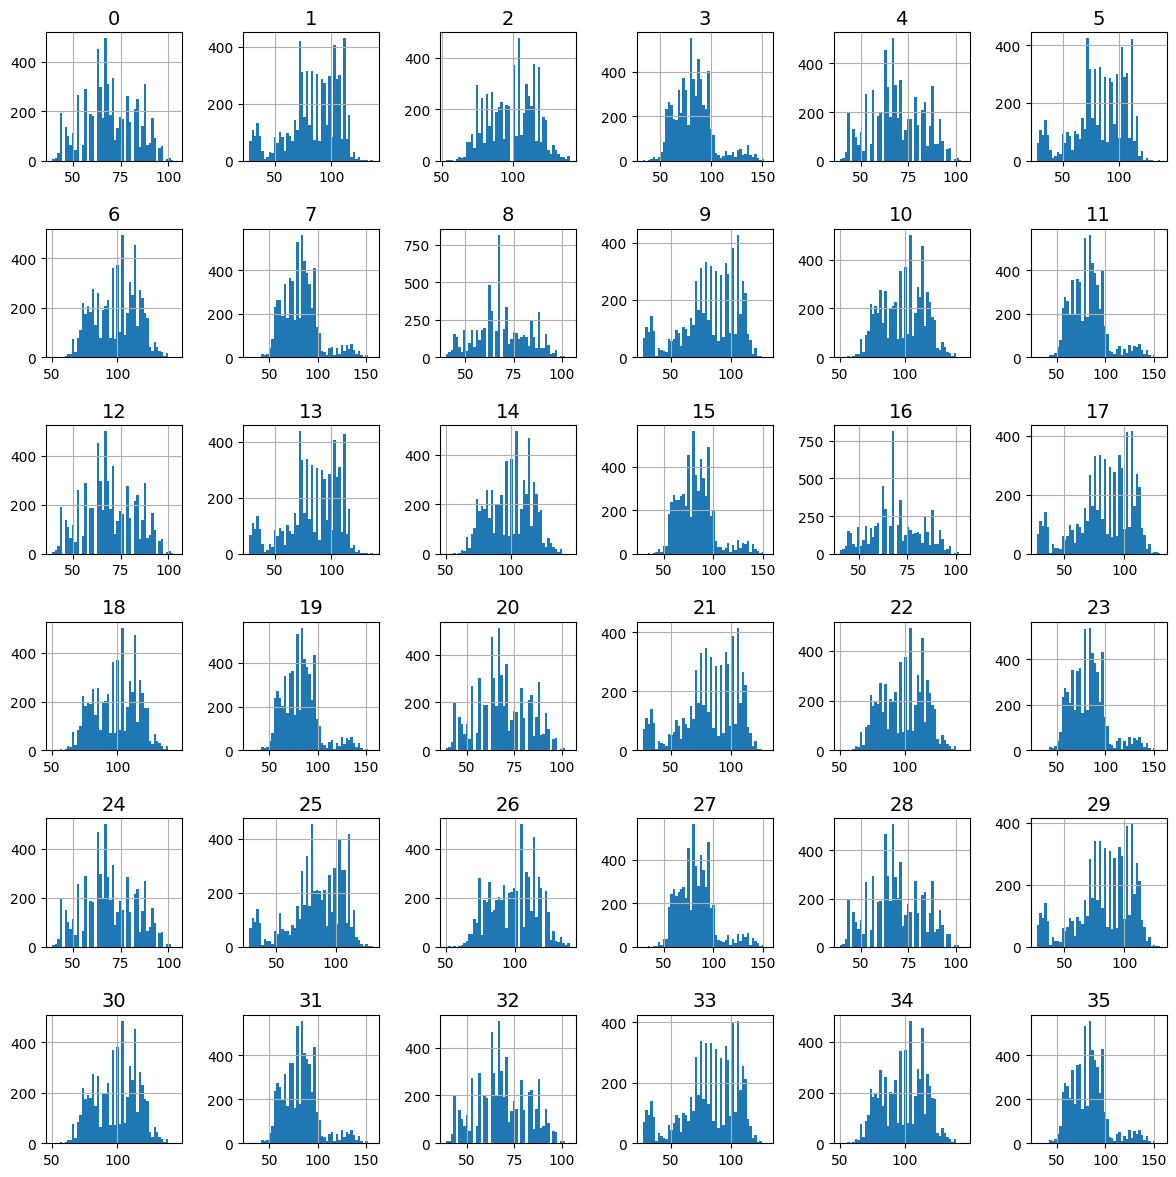

In [62]:
df.hist(bins=50, figsize=(12, 12))
plt.tight_layout()
plt.show()

En general no parece que podamos afirmar nada. Está claro que hay muchos outliers. Veamos un boxplot.

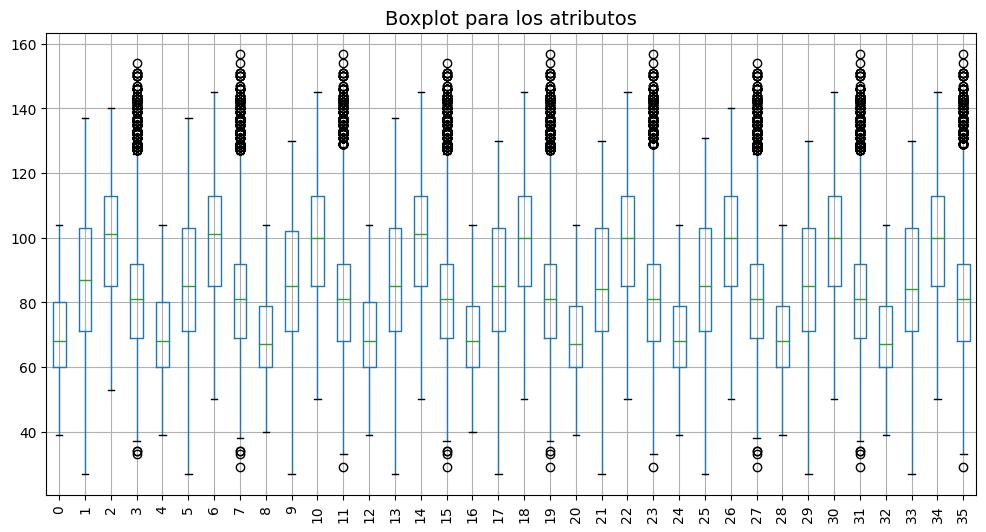

In [63]:
# Genera el boxplot para los atributos
plt.figure(figsize=(12, 6))
df.boxplot()
plt.title('Boxplot para los atributos')
plt.xticks(rotation=90)
plt.show()

En efecto, está todo muy disperso.


#### <font color='blue'> 2. Construcción y ajuste del modelo.


Voy a usar `ECOD` (Empirical Cumulative Distribution-based Outlier Detection). La Detección de Valores Atípicos basada en la Distribución Empírica Acumulativa (`ECOD`) tiene un enfoque muy intuitivo: Los valores atípicos son eventos raros en las colas de una distribución, pueden identificarse midiendo la ubicación en una distribución.
`ECOD` primero estima la distribución de una variable de manera no paramétrica. Luego multiplica las probabilidades de cola estimadas de todas las dimensiones para obtener la puntuación de anomalía para una observación. Matemáticamente, es difícil estimar las distribuciones conjuntas de múltiples dimensiones. `ECOD` supone la independencia de variables para poder estimar la distribución acumulativa empírica de cada variable.

In [64]:
from pyod.models.ecod import ECOD
ecod = ECOD(contamination=0.32)
ecod.fit(df)

# Training data
y_train_scores = ecod.decision_function(df)
y_train_pred = ecod.predict(df)

# Threshold for the defined comtanimation rate
print("The threshold:" , ecod.threshold_)

def count_stat(vector):
    # Because it is '0' and '1', we can run a count statistic.
    unique, counts = np.unique(vector, return_counts=True)
    return dict(zip(unique, counts))

print("The training data:", count_stat(y_train_pred))

The threshold: 62.24709921887431
The training data: {0: 4376, 1: 2059}


In [65]:
ecod.get_params()

{'contamination': 0.32, 'n_jobs': 1}


#### <font color='blue'> 3. Experimentación y determinación de los umbrales más razonables para la identificación de anomalías.

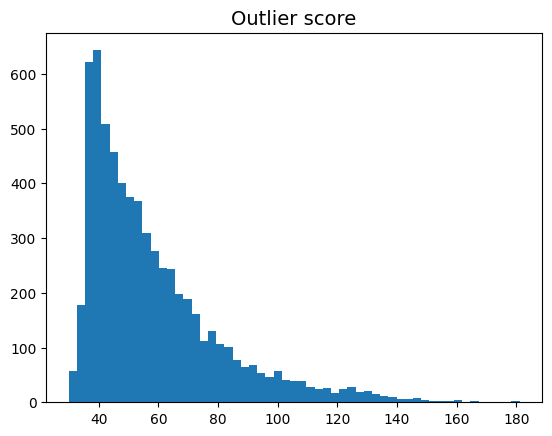

In [66]:
plt.hist(y_train_scores, bins='auto') # arguments are passed to np.histogram
plt.title("Outlier score")
plt.show()

De este histograma no se puede obtener mucha información. No queda claro a partir de qué umbral estarían las anomalías, así que lo dejo tal y como lo ha calculado `ECOD`.

In [67]:
threshold = ecod.threshold_
descriptive_stat_threshold(df,y_train_scores, threshold)

,Group,Count,Count %,0,1,2,3,4,5,6,...,27,28,29,30,31,32,33,34,35,Anomaly_Score
0,Normal,4376,68.003108,71.134,87.801,97.359,78.633,70.909,87.467,97.174,...,78.622,70.822,87.646,97.197,78.544,70.697,87.479,97.153,78.584,45.838
1,Outlier,2059,31.996892,65.715,74.655,103.395,91.008,65.413,74.267,103.227,...,91.243,64.953,73.581,103.182,91.277,64.542,73.040,102.694,90.840,84.556


Efectivamente, los inliers tienen un anomaly score más bajo que los outliers. Sin embargo es alto en general y la diferencia no es tan grande. Parece que no va muy bien.

#### <font color='blue'> 4. Comprobación de errores usando la información Ground Truth del conjunto de datos.

In [68]:
confusion_matrix_threshold(Y.reshape(-1),y_train_scores,threshold)

Pred,0,1
Actual,,
0,3258,1141
1,1118,918


En efecto, tenemos muchos errores. Nos hemos equivocado clasificando 1141 inliers como outliers y 1118 outliers como inliers.

Como conclusión podríamos decir que la detección de outliers en este problema es un poco complicada. Se observa que la detección corresponde con la realidad, pero comete muchos errores. A lo mejor con técnicas distintas va mejor.